In [100]:
# !pip install DecisionBoundaryDisplay

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
from sklearn.ensemble import IsolationForest
import warnings
import module as md
import seaborn as sns

In [102]:
warnings.filterwarnings('ignore')

In [103]:
os.getcwd()

'D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data\\06_Anomaly_detection'

In [104]:
file_list = os.listdir('D:/jupyter/01_Sangwoo_Project/03_Project/03_GyengnamTP/03_Collecting_data/06_Anomaly_detection')
file_list

['(2022.10.04)Anomaly_detection_with_IsolationForest_for_valid_shots.ipynb',
 '(2022.10.06) VL04_Tool5_Anomaly_detection.ipynb',
 '.ipynb_checkpoints',
 'Daeshin_parameter_220713_0831_VL04_raw_data.csv',
 'Daeshin_parameter_220901_1013_VL04_raw_data.csv',
 'Daeshin_parameter_221014_1017_VL04_raw_data.csv',
 'Daeshin_parameter_221018_1023_VL04_raw_data.csv',
 'data_extract.ipynb',
 'data_extract_result_preprocessing_data.csv',
 'Feature_selection.ipynb',
 'IF_training_model.pkl',
 'module.ipynb',
 'module.py',
 'VL04_data.parquet',
 'VL04_Tool5_Anomaly_detection.ipynb',
 'VL04_Tool5_Anomaly_detection_data221023.ipynb',
 'VL04_Tool5_Anomaly_detection_version2.ipynb',
 '__pycache__']

In [105]:
[file_csv for file_csv in file_list if file_csv.endswith('.csv')]

['Daeshin_parameter_220713_0831_VL04_raw_data.csv',
 'Daeshin_parameter_220901_1013_VL04_raw_data.csv',
 'Daeshin_parameter_221014_1017_VL04_raw_data.csv',
 'Daeshin_parameter_221018_1023_VL04_raw_data.csv',
 'data_extract_result_preprocessing_data.csv']

In [106]:
df = pd.read_csv('data_extract_result_preprocessing_data.csv', index_col = 0)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29261717 entries, 369883 to 40032258
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   shot_no          float64
 2   tool_number      float64
 3   current_spindle  int64  
 4   current_x        float64
 5   current_z        float64
 6   vibration        int64  
 7   rpm              float64
 8   rpm_set          float64
 9   feed             float64
 10  feed_set         float64
 11  load_1           float64
 12  servo_load_x     float64
 13  servo_load_z     float64
 14  servo_current_x  float64
 15  servo_current_z  float64
 16  tool_state       float64
 17  tool             float64
 18  real_shot        int64  
dtypes: float64(15), int64(3), object(1)
memory usage: 4.4+ GB


In [108]:
df['real_shot'].value_counts()

891     477459
1506    448991
1153    336010
752     323469
98      304841
         ...  
584      10357
583      10356
588      10356
91       10347
90       10331
Name: real_shot, Length: 1673, dtype: int64

In [109]:
df.columns

Index(['datetime', 'shot_no', 'tool_number', 'current_spindle', 'current_x',
       'current_z', 'vibration', 'rpm', 'rpm_set', 'feed', 'feed_set',
       'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x',
       'servo_current_z', 'tool_state', 'tool', 'real_shot'],
      dtype='object')

In [110]:
# msno.matrix(df)

In [111]:
df_mod1 = df.copy()
df_mod1 = df_mod1.dropna(axis = 0)
df_mod1 = df_mod1[df_mod1['tool'] == 5]
df_mod1.reset_index(inplace = True, drop = True)

In [112]:
df_mod1['tool'].value_counts()

5.0    3923578
Name: tool, dtype: int64

In [113]:
df_mod1

,datetime,shot_no,tool_number,current_spindle,current_x,current_z,vibration,rpm,rpm_set,feed,feed_set,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state,tool,real_shot
0,2022-07-13 20:30:45.590932,5831.0,500.0,2019,0.0,165.0,83,299.0,300.0,0.0,0.0,0.0,4.0,76.0,4.0,-76.0,0.0,5.0,6
1,2022-07-13 20:30:45.773895,5831.0,500.0,2019,0.0,165.0,81,299.0,300.0,0.0,0.0,1.0,4.0,75.0,4.0,-75.0,0.0,5.0,6
2,2022-07-13 20:30:45.979629,5831.0,500.0,2019,0.0,165.0,82,299.0,300.0,0.0,0.0,1.0,4.0,75.0,4.0,-75.0,0.0,5.0,6
3,2022-07-13 20:30:46.175175,5831.0,500.0,2019,0.0,4.0,82,300.0,300.0,0.0,0.0,0.0,4.0,75.0,4.0,-75.0,0.0,5.0,6
4,2022-07-13 20:30:46.374425,5831.0,500.0,2019,0.0,4.0,81,300.0,300.0,0.0,0.0,0.0,4.0,75.0,4.0,-75.0,0.0,5.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923573,2022-10-17 23:28:28.710898,7604.0,505.0,7734,126.0,12.0,60,262.0,0.0,0.0,0.0,117.0,4.0,69.0,4.0,-69.0,5.0,5.0,1678
3923574,2022-10-17 23:28:28.888407,7604.0,505.0,7734,10.0,12.0,59,262.0,0.0,0.0,0.0,117.0,4.0,69.0,4.0,-69.0,5.0,5.0,1678
3923575,2022-10-17 23:28:29.069496,7604.0,505.0,7734,10.0,12.0,59,186.0,0.0,0.0,0.0,122.0,4.0,70.0,4.0,-70.0,5.0,5.0,1678
3923576,2022-10-17 23:28:29.311496,7604.0,505.0,4683,10.0,8.0,59,81.0,0.0,0.0,0.0,114.0,3.0,69.0,3.0,-69.0,5.0,5.0,1678


In [114]:
df_mod1.groupby('real_shot').mean()

,shot_no,tool_number,current_spindle,current_x,current_z,vibration,rpm,rpm_set,feed,feed_set,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state,tool
real_shot,,,,,,,,,,,,,,,,,
6,5831.0,504.974874,2499.265418,33.015989,127.703061,83.841023,298.987666,299.177707,293.243033,0.0,5.356327,8.682047,58.878026,5.838739,-58.881224,4.974874,5.0
7,5832.0,504.970320,2485.902283,32.487671,128.134703,86.050228,298.956164,299.041096,311.790868,0.0,5.222831,8.572603,59.079452,5.636530,-59.017808,4.970320,5.0
8,5833.0,504.974874,2500.598447,33.254911,129.787574,82.709913,298.869804,299.177707,312.858840,0.0,5.227044,8.412974,58.601188,5.725445,-58.591138,4.974874,5.0
9,5834.0,504.979106,2432.359799,30.347263,115.796072,82.440869,299.033013,299.247806,269.981195,0.0,4.832428,8.488926,58.551191,5.718763,-58.553280,4.979106,5.0
10,5835.0,504.974874,2460.962083,32.218365,127.495660,83.537232,298.915943,299.040658,296.628141,0.0,5.042028,8.518502,58.622202,5.599360,-58.591594,4.974874,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,7600.0,504.977035,2478.696451,31.713570,115.717745,60.474739,298.769102,299.123173,268.970772,0.0,5.204175,7.865553,58.976200,5.446764,-58.996242,4.977035,5.0
1675,7601.0,504.977035,2487.103132,31.202923,116.191232,60.645929,298.892693,298.997912,272.039248,0.0,5.168685,7.869311,59.012526,5.393319,-59.002505,4.977035,5.0
1676,7602.0,504.974958,2488.373539,29.969533,116.670701,60.836394,298.901085,299.248748,280.988731,0.0,5.233723,7.969533,59.026711,5.489983,-59.023372,4.974958,5.0


current_spindle


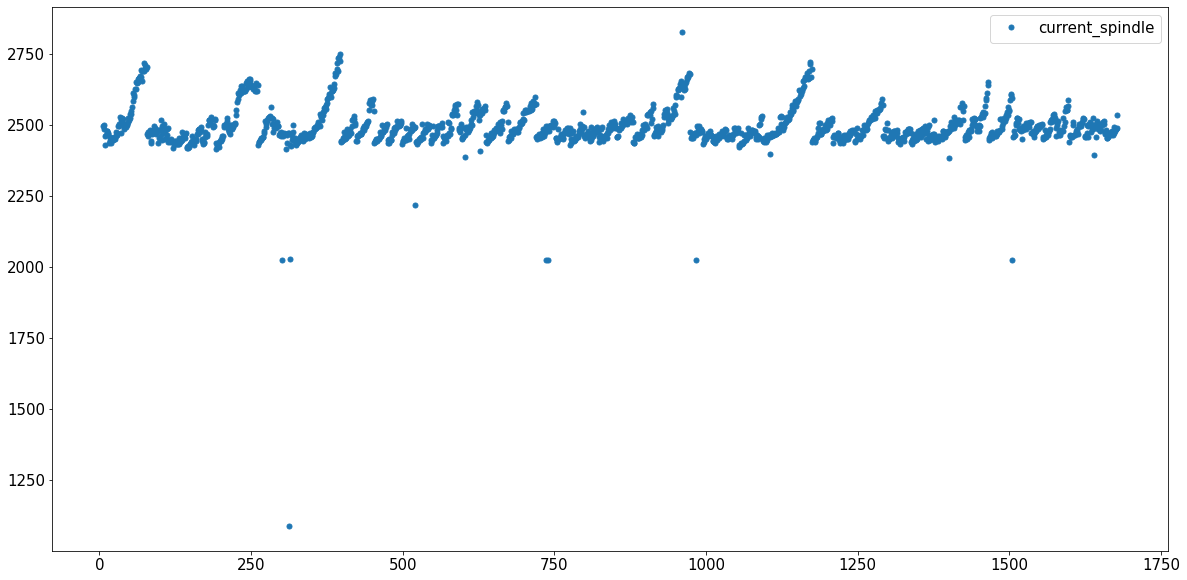

In [115]:
md.show_plot(df_mod1.groupby('real_shot').mean(), ['current_spindle'])

# Data scaling

In [116]:
df_mod1.columns

Index(['datetime', 'shot_no', 'tool_number', 'current_spindle', 'current_x',
       'current_z', 'vibration', 'rpm', 'rpm_set', 'feed', 'feed_set',
       'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x',
       'servo_current_z', 'tool_state', 'tool', 'real_shot'],
      dtype='object')

In [117]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [118]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
parameter = df_mod1[['current_spindle', 'current_x','current_z', 'rpm', 'feed', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x','servo_current_z']]
shot_no = df_mod1[['real_shot']]
sts_data = pd.DataFrame(standard_scaler.fit_transform(parameter), columns = parameter.columns)
sts_data_overall = pd.concat([shot_no, sts_data], axis = 1)
sts_data_temp = sts_data.copy()
mms_data = pd.DataFrame(minmax_scaler.fit_transform(parameter), columns = parameter.columns)
mms_data_overall = pd.concat([shot_no, mms_data], axis = 1)
mms_data_temp = mms_data.copy()
rbs_data = pd.DataFrame(robust_scaler.fit_transform(parameter), columns = parameter.columns)
rbs_data_overall = pd.concat([shot_no, rbs_data], axis = 1)
rbs_data_temp = rbs_data.copy()

In [119]:
# #  Standard scaler
# plt.figure(figsize = (20,12))
# plt.plot(sts_data['current_spindle'])
# plt.legend()
# # plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# # plt.xlabel('Shot_no', fontsize = 20)
# # plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# # plt.ylabel('current_spindle', fontsize = 20)

In [120]:
# # Minmax scaler
# plt.figure(figsize = (20,12))
# plt.plot(mms_data['current_spindle'])
# plt.legend()
# # plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# # plt.xlabel('Shot_no', fontsize = 20)
# # plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# # plt.ylabel('current_spindle', fontsize = 20)

In [121]:
# # Robust scaler
# plt.figure(figsize = (20,12))
# plt.plot(rbs_data['current_spindle'])
# plt.legend()
# # plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# # plt.xlabel('Shot_no', fontsize = 20)
# # plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# # plt.ylabel('current_spindle', fontsize = 20)

In [122]:
rbs_data_overall

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,6,-0.340970,-0.730769,1.019231,0.0,-60.0,-0.571429,-0.571429,6.000000,-0.375,-6.000000
1,6,-0.340970,-0.730769,1.019231,0.0,-60.0,-0.428571,-0.571429,5.666667,-0.375,-5.666667
2,6,-0.340970,-0.730769,1.019231,0.0,-60.0,-0.428571,-0.571429,5.666667,-0.375,-5.666667
3,6,-0.340970,-0.730769,-0.012821,1.0,-60.0,-0.571429,-0.571429,5.666667,-0.375,-5.666667
4,6,-0.340970,-0.730769,-0.012821,1.0,-60.0,-0.571429,-0.571429,5.666667,-0.375,-5.666667
...,...,...,...,...,...,...,...,...,...,...,...
3923573,1678,7.361186,4.115385,0.038462,-37.0,-60.0,16.142857,-0.571429,3.666667,-0.375,-3.666667
3923574,1678,7.361186,-0.346154,0.038462,-37.0,-60.0,16.142857,-0.571429,3.666667,-0.375,-3.666667
3923575,1678,7.361186,-0.346154,0.038462,-113.0,-60.0,16.857143,-0.571429,4.000000,-0.375,-4.000000
3923576,1678,3.249326,-0.346154,0.012821,-218.0,-60.0,15.714286,-0.714286,3.666667,-0.500,-3.666667


In [123]:
sts_data_overall

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,6,-0.782316,-0.352614,0.212130,-0.027945,-0.205583,-0.750392,-0.699903,2.579808,-0.197668,-2.439728
1,6,-0.782316,-0.352614,0.212130,-0.027945,-0.205583,-0.608966,-0.699903,2.433181,-0.197668,-2.301443
2,6,-0.782316,-0.352614,0.212130,-0.027945,-0.205583,-0.608966,-0.699903,2.433181,-0.197668,-2.301443
3,6,-0.782316,-0.352614,-0.495063,0.048917,-0.205583,-0.750392,-0.699903,2.433181,-0.197668,-2.301443
4,6,-0.782316,-0.352614,-0.495063,0.048917,-0.205583,-0.750392,-0.699903,2.433181,-0.197668,-2.301443
...,...,...,...,...,...,...,...,...,...,...,...
3923573,1678,8.624304,1.079639,-0.459923,-2.871842,-0.205583,15.796373,-0.699903,1.553417,-0.197668,-1.471737
3923574,1678,8.624304,-0.238943,-0.459923,-2.871842,-0.205583,15.796373,-0.699903,1.553417,-0.197668,-1.471737
3923575,1678,8.624304,-0.238943,-0.459923,-8.713360,-0.205583,16.503499,-0.699903,1.700045,-0.197668,-1.610022
3923576,1678,3.602502,-0.238943,-0.477493,-16.783879,-0.205583,15.372097,-0.870498,1.553417,-0.318677,-1.471737


In [124]:
# scaler 데이터 group화(대표값)
raw_list = [sts_data_overall, mms_data_overall, rbs_data_overall]
group_name = ['sts_group', 'mms_group', 'rbs_group']
for group_idx in range(len(raw_list)):
    globals()['{}'.format(group_name[group_idx])] = raw_list[group_idx].groupby(by = 'real_shot').mean()
    globals()['{}_parameter'.format(group_name[group_idx])] = globals()['{}'.format(group_name[group_idx])][['current_spindle', 'current_x','current_z', 'rpm', 'feed', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x','servo_current_z']]
    globals()['{}_shot'.format(group_name[group_idx])] = globals()['{}'.format(group_name[group_idx])].index.values
mms_group

,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
real_shot,,,,,,,,,,
6,0.299313,0.018643,0.038015,0.900565,0.010368,0.032861,0.061141,0.207317,0.510211,0.632356
7,0.297713,0.018344,0.038144,0.900470,0.011024,0.032042,0.060370,0.208026,0.509484,0.631972
8,0.299473,0.018777,0.038640,0.900210,0.011061,0.032068,0.059246,0.206342,0.509804,0.633171
9,0.291301,0.017136,0.034442,0.900702,0.009545,0.029647,0.059781,0.206166,0.509780,0.633277
10,0.294726,0.018192,0.037952,0.900349,0.010487,0.030933,0.059989,0.206416,0.509350,0.633170
...,...,...,...,...,...,...,...,...,...,...
1674,0.296850,0.017907,0.034419,0.899907,0.009510,0.031927,0.055391,0.207663,0.508801,0.632033
1675,0.297857,0.017619,0.034561,0.900279,0.009618,0.031710,0.055418,0.207791,0.508609,0.632015
1676,0.298009,0.016922,0.034705,0.900304,0.009935,0.032109,0.056123,0.207841,0.508957,0.631957


current_spindle


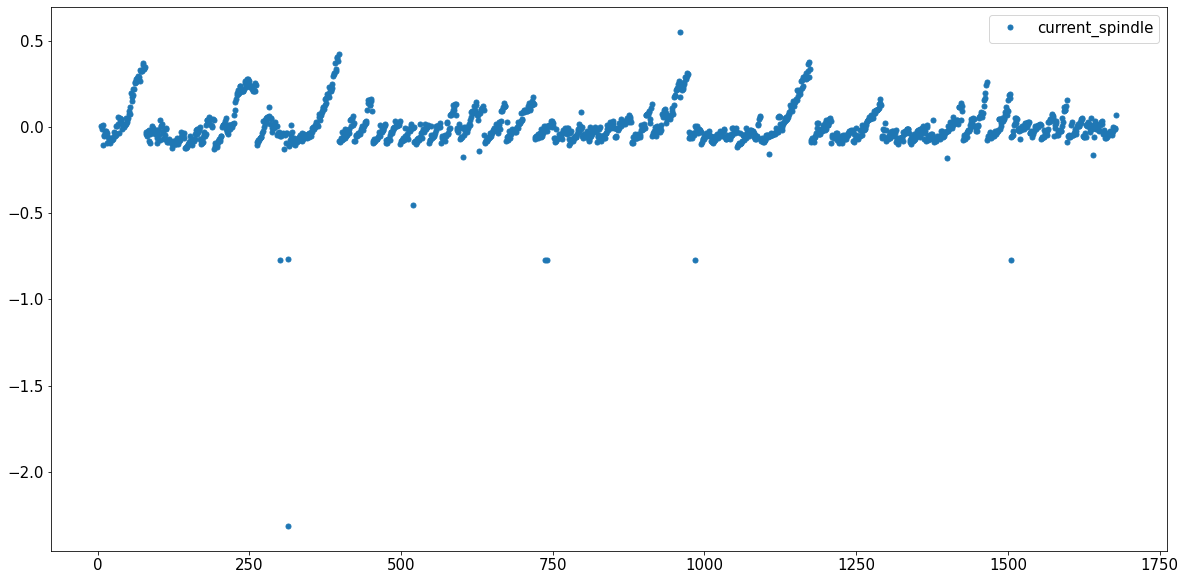

In [125]:
md.show_plot(sts_group_parameter, ['current_spindle'])

current_spindle


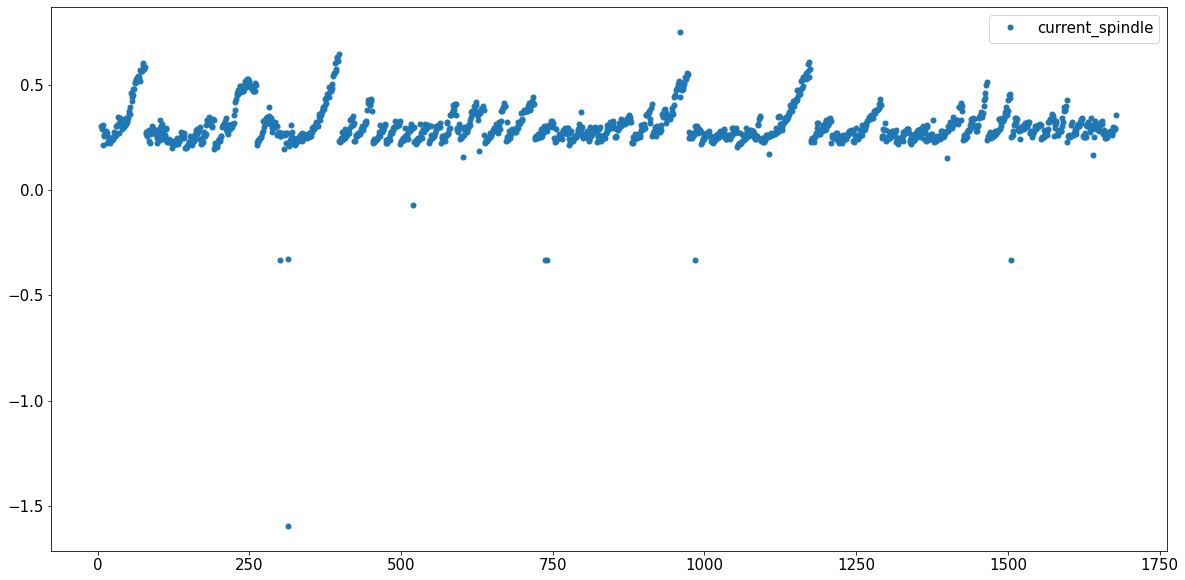

In [126]:
md.show_plot(rbs_group_parameter, ['current_spindle'])

# 0. 기계학습 기반의 이상 탐지 기법
 - Chandola, V., Banerjee, A., & Kumar, V. (2009). Anomaly detection: A survey. ACM computing surveys (CSUR), 41(3), 15 참조
 - 기계학습(Machine Learning) 기반 이상 탐지(Anomaly Detection) 기법 연구 : 보건사회 분야를 중심으로, 오미애, 박아연, 김용대, 진재현, 2018 참조
 - Deep learning 이상탐지 기법은 추가적 조사 필요
 1. 분류 기반 이상 탐지 기법
  (1) 결정 규칙(Decision rule) 기반
  (2) SVM 기반
  (3) 신경망 기반
  (4) 베이지안 네트워크 기반
 2. NN(Nearest neighbor) 기반 이상 탐지 기법
  (1) k번째로 가까운 개체와의 거리 이용(거리 기반)
  (2) 상대 밀도 기반(밀도 기반)
 3. 군집화(Clustering) 기반 이상 탐지 기법
  (1) 근본 가정에 따른 군집화 기반 이상 탐지 기법
 4. 통계적 기법
  (1) 모수적 기법 - 1) 정규모형, 2) 회귀모형, 3) 혼합 모수적 모형
  (2) 비모수적 기법 - 1) 히스토그램, 2) 커널 함수
 5. 정보 이론 기법
 6. 스펙트럴 이상 탐지 기법
 7. 맥락적 이상 탐지
  (1) 점 이상 문제로 축소
  (2) 자료 구조 활용
 8. 딥러닝 이상 탐지 기법
  (1) Deep Embedded Clustering(DEC)
  (2) Deep Autoencoding Gaussian Mixture Model(DAGMM)

# 나. Scaling data 기반의 전체 Feature 모델 수립

In [127]:
# sts_group_parameter, mms_group_parameter, rbs_group_parameter (scaler 변경)
result = pd.DataFrame(rbs_group_parameter, columns = parameter.columns)
result_corr = result.corr()
result_corr

,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
current_spindle,1.000000,0.536808,0.260744,0.408285,0.219767,0.925402,0.450681,-0.378349,0.556730,0.372701
current_x,0.536808,1.000000,0.461097,0.591996,0.564640,0.542795,0.433677,-0.125546,0.437317,0.172674
current_z,0.260744,0.461097,1.000000,0.400839,0.457883,0.211899,0.325193,-0.074050,0.173108,-0.025673
rpm,0.408285,0.591996,0.400839,1.000000,0.485917,0.227998,0.164697,-0.228347,0.101969,0.263035
feed,0.219767,0.564640,0.457883,0.485917,1.000000,0.175255,0.129973,-0.040559,0.098442,0.057062
load_1,0.925402,0.542795,0.211899,0.227998,0.175255,1.000000,0.459519,-0.248707,0.602012,0.248620
servo_load_x,0.450681,0.433677,0.325193,0.164697,0.129973,0.459519,1.000000,-0.488157,0.911735,0.445631
servo_load_z,-0.378349,-0.125546,-0.074050,-0.228347,-0.040559,-0.248707,-0.488157,1.000000,-0.468416,-0.980045
servo_current_x,0.556730,0.437317,0.173108,0.101969,0.098442,0.602012,0.911735,-0.468416,1.000000,0.445722
servo_current_z,0.372701,0.172674,-0.025673,0.263035,0.057062,0.248620,0.445631,-0.980045,0.445722,1.000000


In [128]:
result

,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
real_shot,,,,,,,,,,
6,0.306288,0.539077,0.780148,-0.012334,233.243033,0.193761,0.097435,0.292675,-0.145158,-0.293741
7,0.288278,0.518757,0.782915,-0.043836,251.790868,0.174690,0.081800,0.359817,-0.170434,-0.339269
8,0.308084,0.548266,0.793510,-0.130196,252.858840,0.175292,0.058996,0.200396,-0.159319,-0.197046
9,0.216118,0.436433,0.703821,0.033013,209.981195,0.118918,0.069847,0.183730,-0.160155,-0.184427
10,0.254666,0.508399,0.778818,-0.084057,236.628141,0.148861,0.074072,0.207401,-0.175080,-0.197198
...,...,...,...,...,...,...,...,...,...,...
1674,0.278567,0.488983,0.703319,-0.230898,208.970772,0.172025,-0.019207,0.325400,-0.194154,-0.332081
1675,0.289896,0.469343,0.706354,-0.107307,212.039248,0.166955,-0.018670,0.337509,-0.200835,-0.334168
1676,0.291609,0.421905,0.709428,-0.098915,220.988731,0.176246,-0.004352,0.342237,-0.188752,-0.341124


In [129]:
# import seaborn as sns
# plt.figure(figsize = (20, 12))

# mask = np.triu(np.ones_like(result_corr, dtype=np.bool))
# sns.heatmap(result_corr, mask = mask, vmin = -1, vmax = 1, annot = True, linewidths = .5, annot_kws = {'size':20})
# plt.xticks(fontsize = 16, rotation = 90)
# plt.yticks(fontsize = 16)

In [130]:
result.copy()

,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
real_shot,,,,,,,,,,
6,0.306288,0.539077,0.780148,-0.012334,233.243033,0.193761,0.097435,0.292675,-0.145158,-0.293741
7,0.288278,0.518757,0.782915,-0.043836,251.790868,0.174690,0.081800,0.359817,-0.170434,-0.339269
8,0.308084,0.548266,0.793510,-0.130196,252.858840,0.175292,0.058996,0.200396,-0.159319,-0.197046
9,0.216118,0.436433,0.703821,0.033013,209.981195,0.118918,0.069847,0.183730,-0.160155,-0.184427
10,0.254666,0.508399,0.778818,-0.084057,236.628141,0.148861,0.074072,0.207401,-0.175080,-0.197198
...,...,...,...,...,...,...,...,...,...,...
1674,0.278567,0.488983,0.703319,-0.230898,208.970772,0.172025,-0.019207,0.325400,-0.194154,-0.332081
1675,0.289896,0.469343,0.706354,-0.107307,212.039248,0.166955,-0.018670,0.337509,-0.200835,-0.334168
1676,0.291609,0.421905,0.709428,-0.098915,220.988731,0.176246,-0.004352,0.342237,-0.188752,-0.341124


In [131]:
# train, test set 설정
train_stat = result.copy().iloc[1200:1597, :]
train_shot = pd.Series(train_stat.index.values, name = 'real_shot')
train_parameter = train_stat.reset_index(drop = True)
train_stat = pd.concat([train_shot, train_parameter], axis = 1)
test_stat = result.copy()
test_shot = pd.Series(test_stat.index.values, name = 'real_shot')
test_parameter = test_stat.reset_index(drop = True)
test_stat = pd.concat([test_shot, test_parameter], axis = 1)

current_spindle


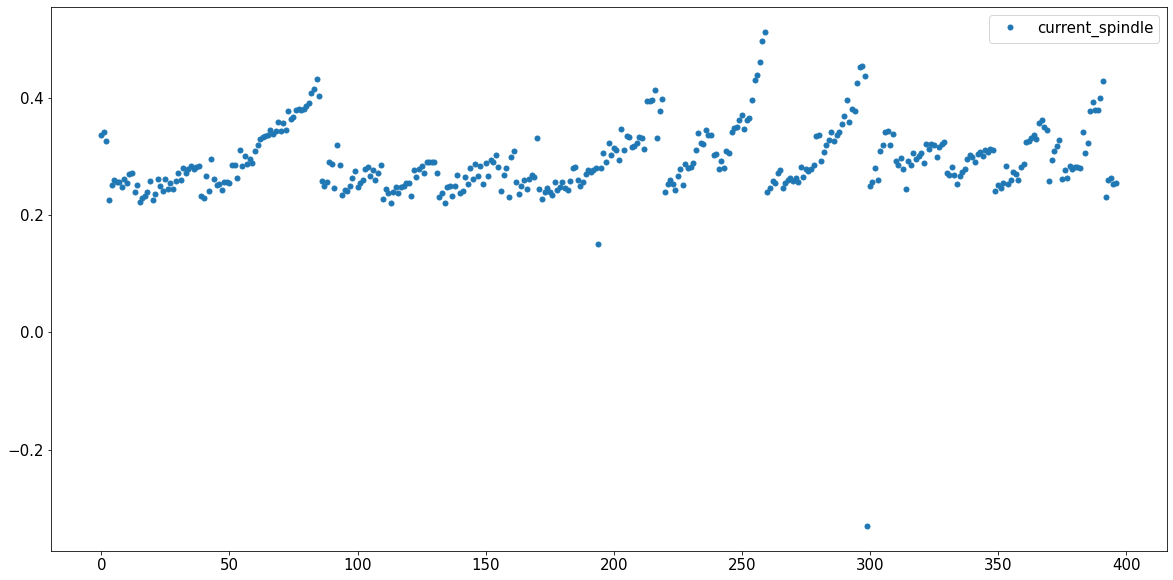

In [132]:
md.show_plot(train_stat, ['current_spindle'])

In [133]:
train_shot

0      1206
1      1207
2      1208
3      1209
4      1210
       ... 
392    1598
393    1599
394    1600
395    1601
396    1602
Name: real_shot, Length: 397, dtype: int64

In [134]:
test_stat.isnull().sum()

real_shot          0
current_spindle    0
current_x          0
current_z          0
rpm                0
feed               0
load_1             0
servo_load_x       0
servo_load_z       0
servo_current_x    0
servo_current_z    0
dtype: int64

In [135]:
train_stat

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,1206,0.335729,0.458903,0.706143,0.008358,227.506895,0.209779,-0.060772,0.296281,-0.208682,-0.302410
1,1207,0.341491,0.440540,0.718886,0.006266,207.304929,0.215897,-0.030135,0.319270,-0.180294,-0.298942
2,1208,0.325696,0.400360,0.724308,-0.065163,202.938179,0.204738,-0.039265,0.409914,-0.218150,-0.398914
3,1209,0.225529,0.394371,0.705774,-0.058504,214.916005,0.130738,-0.066384,0.203510,-0.273872,-0.198356
4,1210,0.251453,0.396927,0.712029,-0.017551,210.188048,0.154618,-0.089786,0.301992,-0.250627,-0.295166
...,...,...,...,...,...,...,...,...,...,...,...
392,1598,0.230065,0.417310,0.634164,-0.082016,227.145237,0.143528,-0.095075,0.172861,-0.221380,-0.106792
393,1599,0.259186,0.382348,0.637792,-0.060658,224.964545,0.165924,-0.087630,0.226541,-0.215239,-0.211875
394,1600,0.263161,0.414324,0.623552,-0.157558,202.222886,0.157985,-0.086373,0.226302,-0.215521,-0.188728
395,1601,0.253307,0.476502,0.696610,-0.208943,213.784789,0.145424,-0.002030,0.129545,-0.214480,-0.125087


In [136]:
train_parameter.columns

Index(['current_spindle', 'current_x', 'current_z', 'rpm', 'feed', 'load_1',
       'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z'],
      dtype='object')

In [137]:
md.check_and_mark_outlier_by_IsolationForest_org(train_stat, test_stat, True, 'current_spindle', 'current_x', 'current_z', 'rpm', 'feed', 'load_1','servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z')

['current_spindle', 'current_x', 'current_z', 'rpm', 'feed', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']


,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
0,1206,0.335729,0.458903,0.706143,0.008358,227.506895,0.209779,-0.060772,0.296281,-0.208682,-0.302410,0,0.204807
1,1207,0.341491,0.440540,0.718886,0.006266,207.304929,0.215897,-0.030135,0.319270,-0.180294,-0.298942,0,0.188715
2,1208,0.325696,0.400360,0.724308,-0.065163,202.938179,0.204738,-0.039265,0.409914,-0.218150,-0.398914,0,0.172592
3,1209,0.225529,0.394371,0.705774,-0.058504,214.916005,0.130738,-0.066384,0.203510,-0.273872,-0.198356,0,0.229742
4,1210,0.251453,0.396927,0.712029,-0.017551,210.188048,0.154618,-0.089786,0.301992,-0.250627,-0.295166,0,0.237568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1598,0.230065,0.417310,0.634164,-0.082016,227.145237,0.143528,-0.095075,0.172861,-0.221380,-0.106792,0,0.234281
393,1599,0.259186,0.382348,0.637792,-0.060658,224.964545,0.165924,-0.087630,0.226541,-0.215239,-0.211875,0,0.244734
394,1600,0.263161,0.414324,0.623552,-0.157558,202.222886,0.157985,-0.086373,0.226302,-0.215521,-0.188728,0,0.231888
395,1601,0.253307,0.476502,0.696610,-0.208943,213.784789,0.145424,-0.002030,0.129545,-0.214480,-0.125087,0,0.229809


In [138]:
train_stat[train_stat['IF_score'] < 0]

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
258,1464,0.497393,0.725586,0.785688,-0.17862,247.246231,0.341121,0.086993,0.048424,-0.059788,-0.038983,1,-0.003373
259,1465,0.512207,0.674192,0.783421,-0.29393,260.423094,0.351699,0.107779,0.048380,-0.047125,-0.043511,1,-0.016688


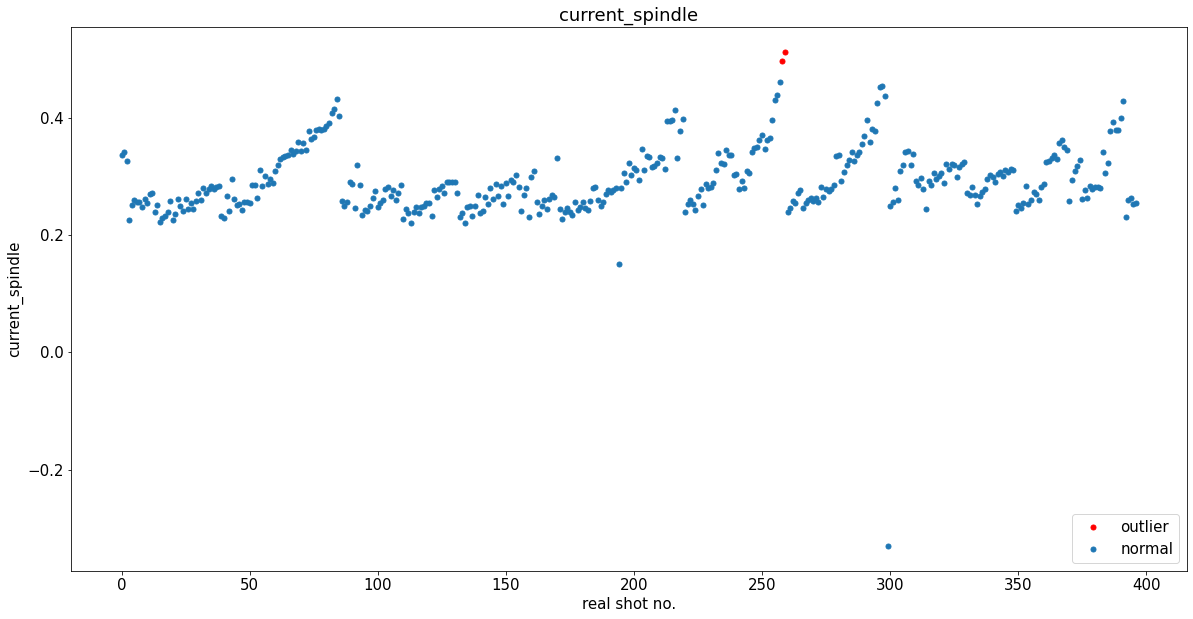

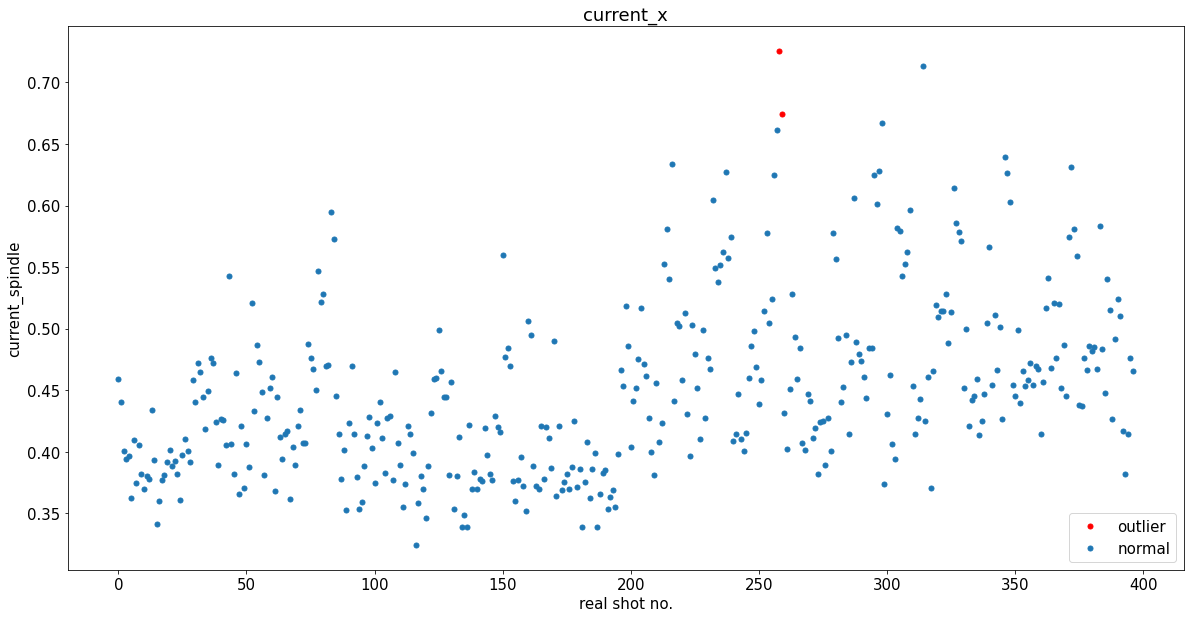

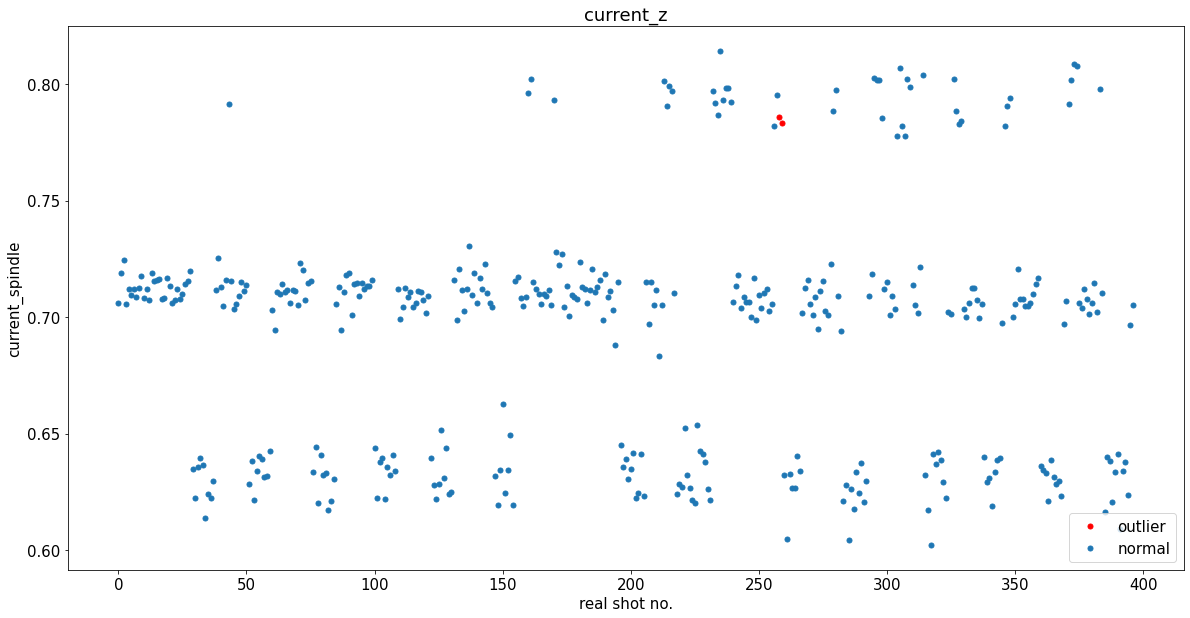

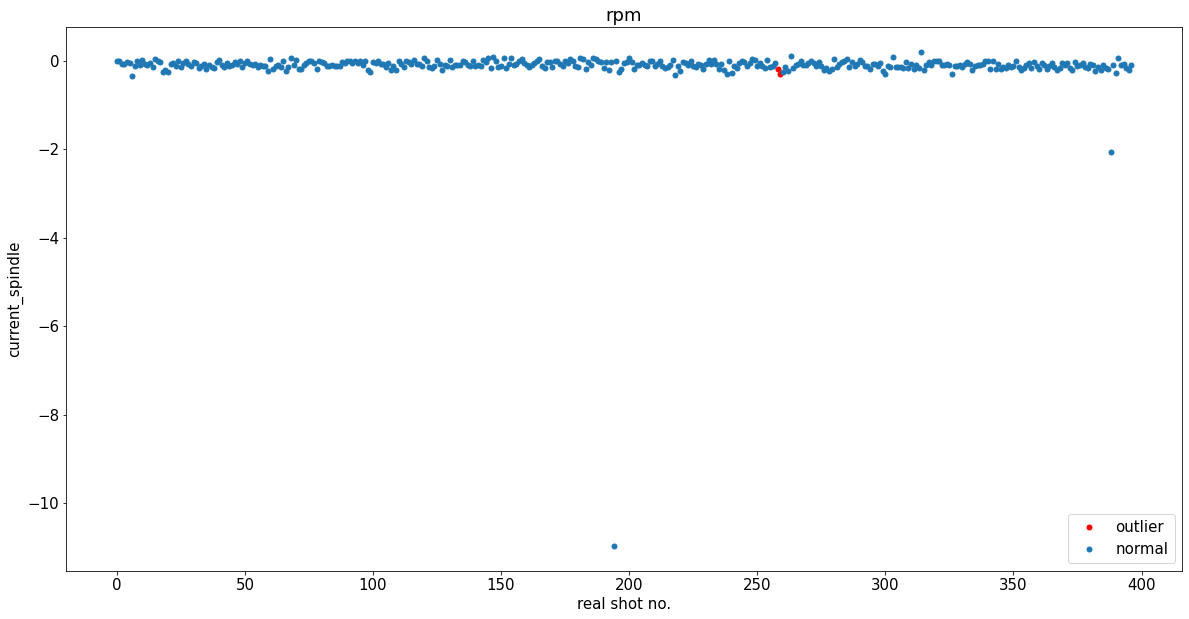

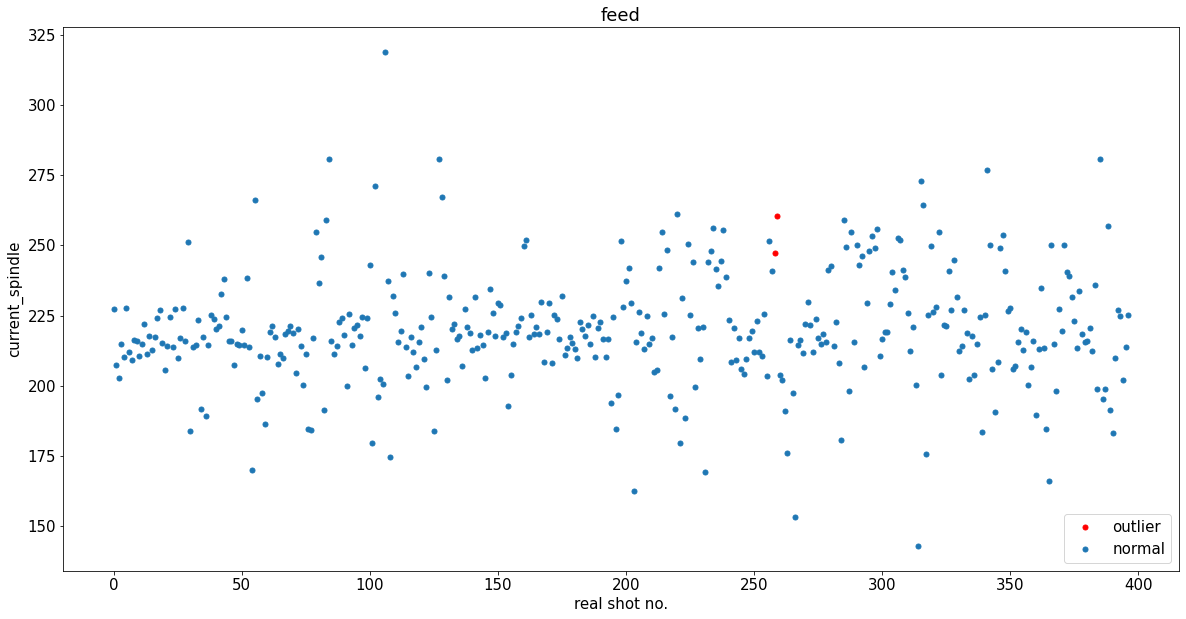

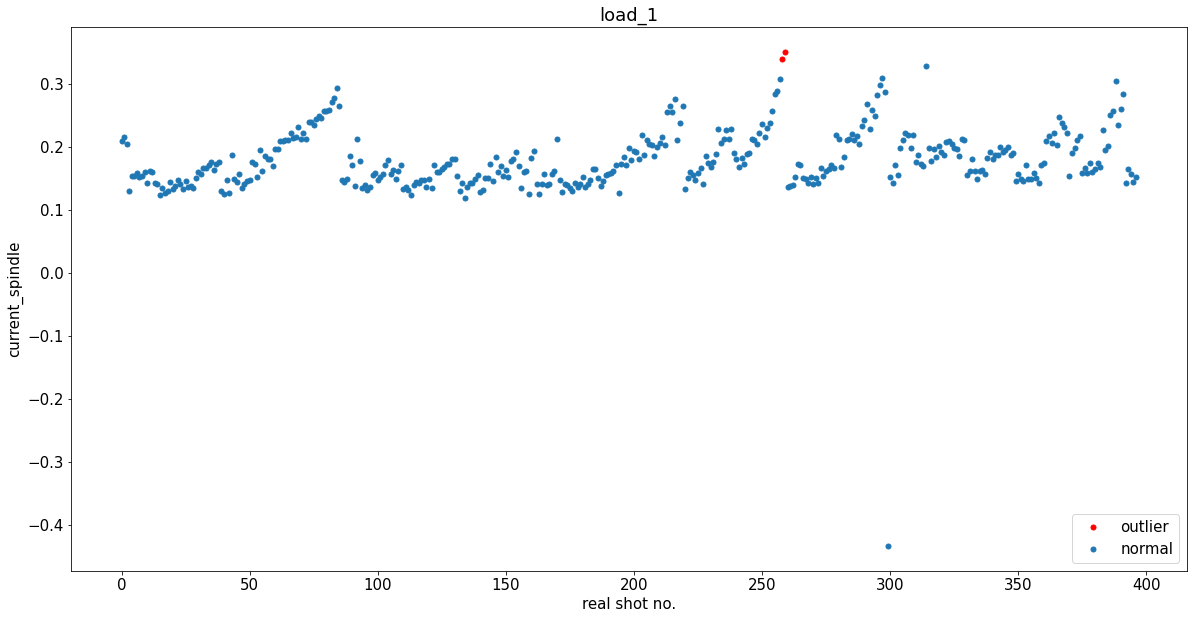

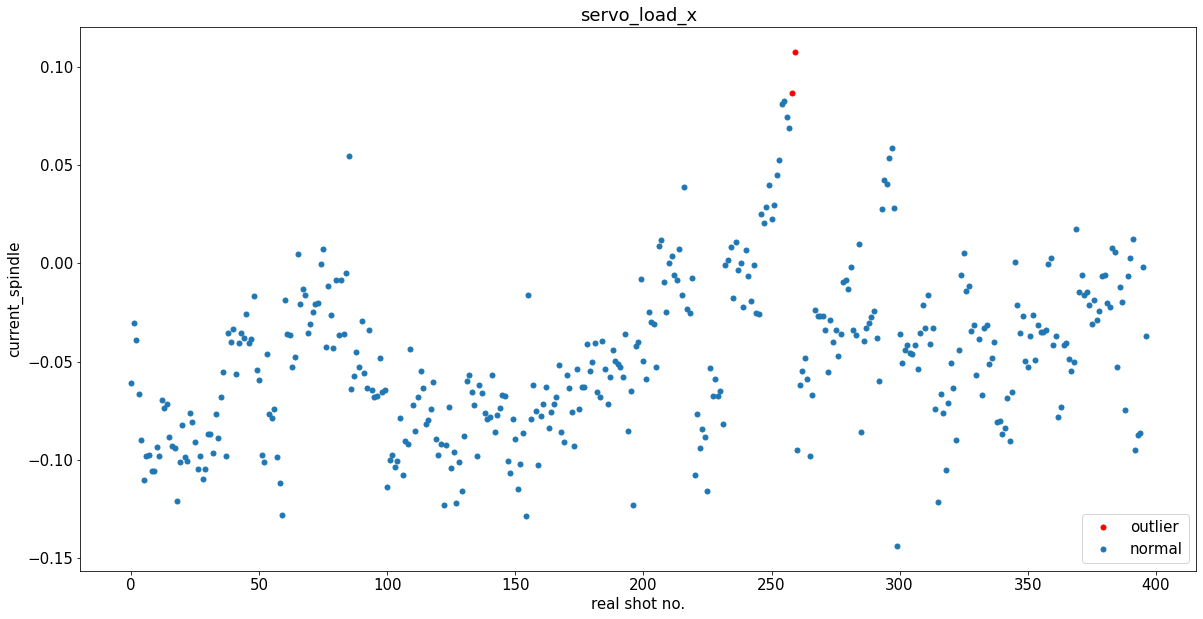

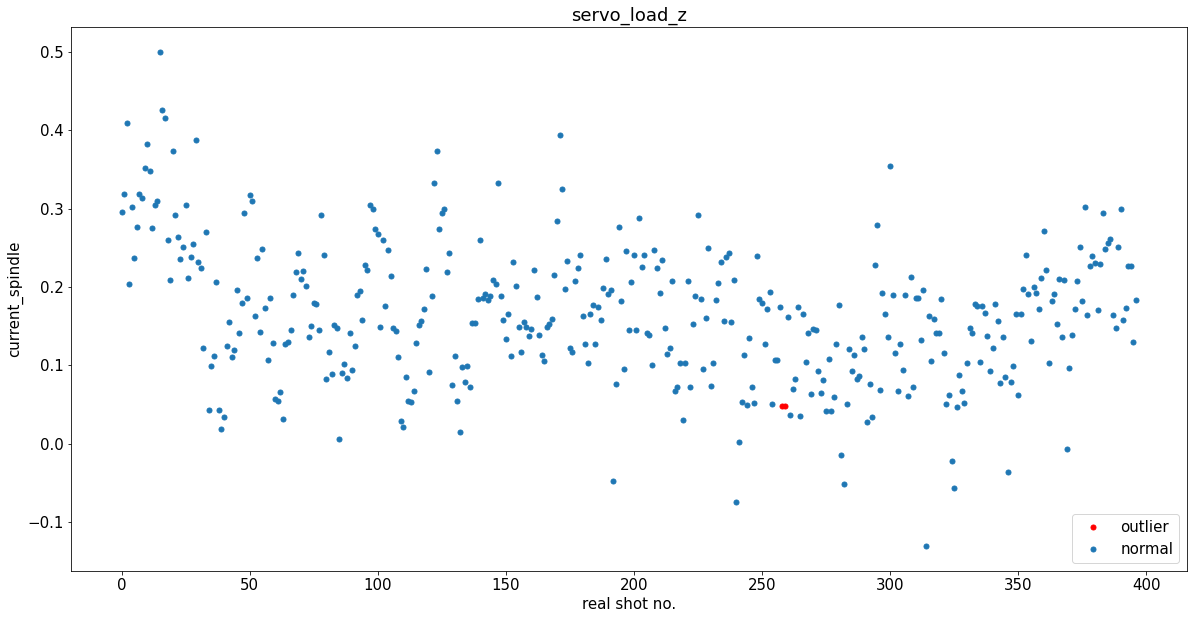

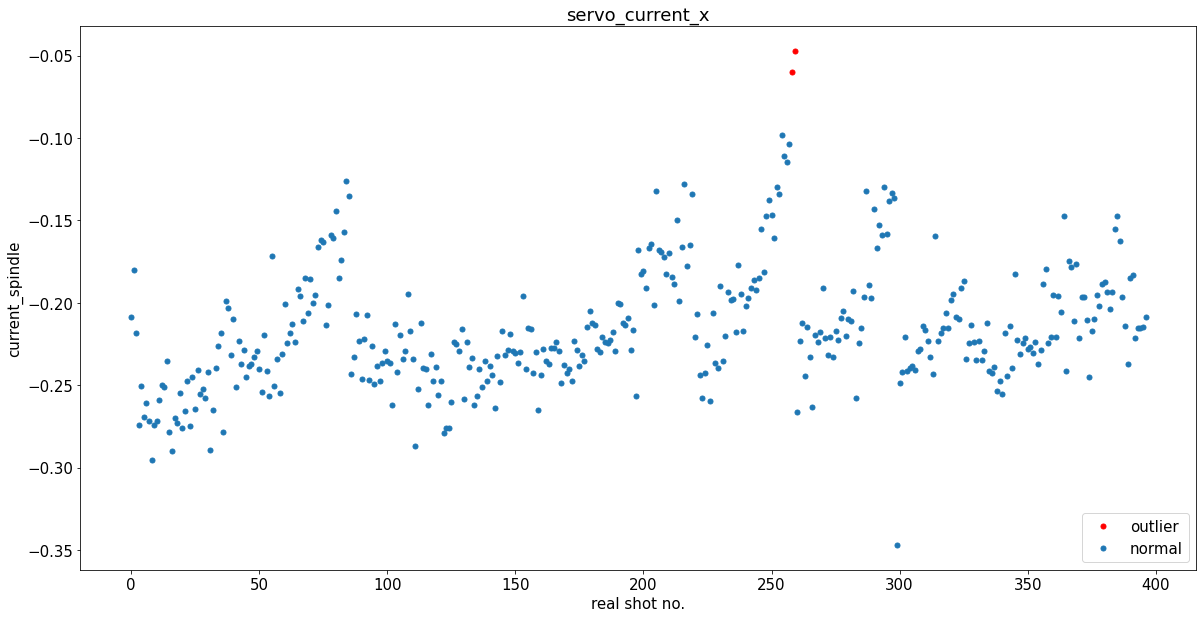

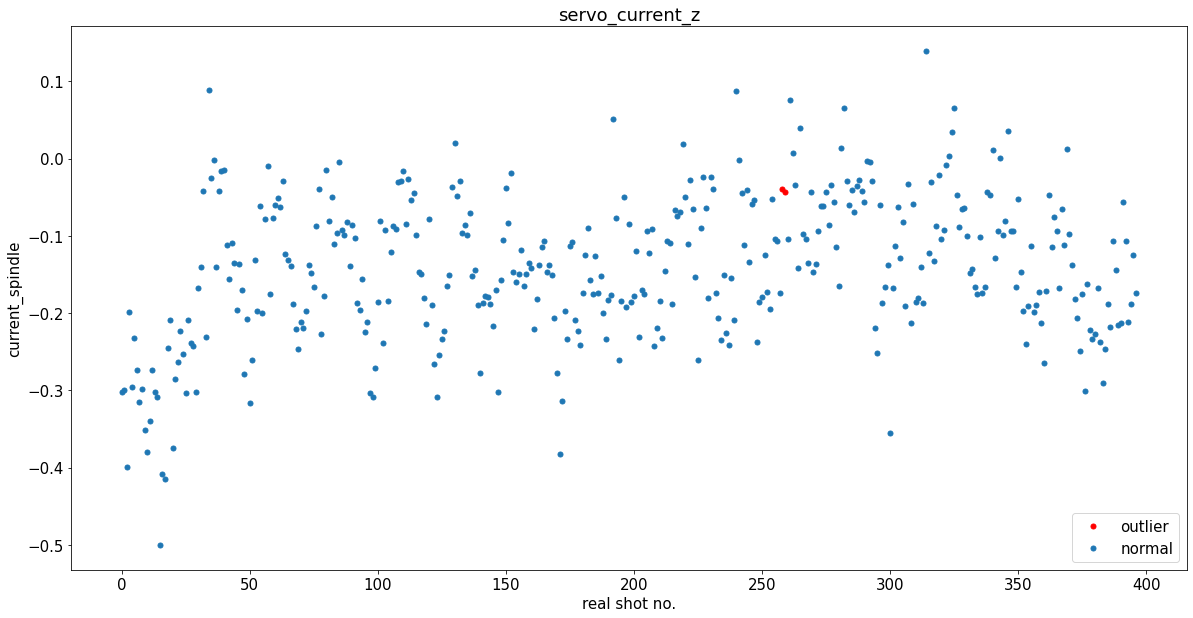

In [139]:
for idx in train_parameter.columns:
    md.show_plot_comparing_data_by_condition(train_stat, idx, 'IF_Outliers', [1], data_names = ('outlier', 'normal'),
                                      title = idx, x_axis_title='real shot no.', y_axis_title='current_spindle')

In [140]:
train_stat

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
0,1206,0.335729,0.458903,0.706143,0.008358,227.506895,0.209779,-0.060772,0.296281,-0.208682,-0.302410,0,0.204807
1,1207,0.341491,0.440540,0.718886,0.006266,207.304929,0.215897,-0.030135,0.319270,-0.180294,-0.298942,0,0.188715
2,1208,0.325696,0.400360,0.724308,-0.065163,202.938179,0.204738,-0.039265,0.409914,-0.218150,-0.398914,0,0.172592
3,1209,0.225529,0.394371,0.705774,-0.058504,214.916005,0.130738,-0.066384,0.203510,-0.273872,-0.198356,0,0.229742
4,1210,0.251453,0.396927,0.712029,-0.017551,210.188048,0.154618,-0.089786,0.301992,-0.250627,-0.295166,0,0.237568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1598,0.230065,0.417310,0.634164,-0.082016,227.145237,0.143528,-0.095075,0.172861,-0.221380,-0.106792,0,0.234281
393,1599,0.259186,0.382348,0.637792,-0.060658,224.964545,0.165924,-0.087630,0.226541,-0.215239,-0.211875,0,0.244734
394,1600,0.263161,0.414324,0.623552,-0.157558,202.222886,0.157985,-0.086373,0.226302,-0.215521,-0.188728,0,0.231888
395,1601,0.253307,0.476502,0.696610,-0.208943,213.784789,0.145424,-0.002030,0.129545,-0.214480,-0.125087,0,0.229809


In [141]:
train_stat.query('IF_Outliers == 1')

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
258,1464,0.497393,0.725586,0.785688,-0.17862,247.246231,0.341121,0.086993,0.048424,-0.059788,-0.038983,1,-0.003373
259,1465,0.512207,0.674192,0.783421,-0.29393,260.423094,0.351699,0.107779,0.048380,-0.047125,-0.043511,1,-0.016688


In [142]:
print("Number of outliers detected: {}".format(len(train_stat.query('IF_Outliers == 1'))))
print("Number of normal samples detected: {}".format(len(train_stat)-len(train_stat.query('IF_Outliers == 1'))))

Number of outliers detected: 2
Number of normal samples detected: 395


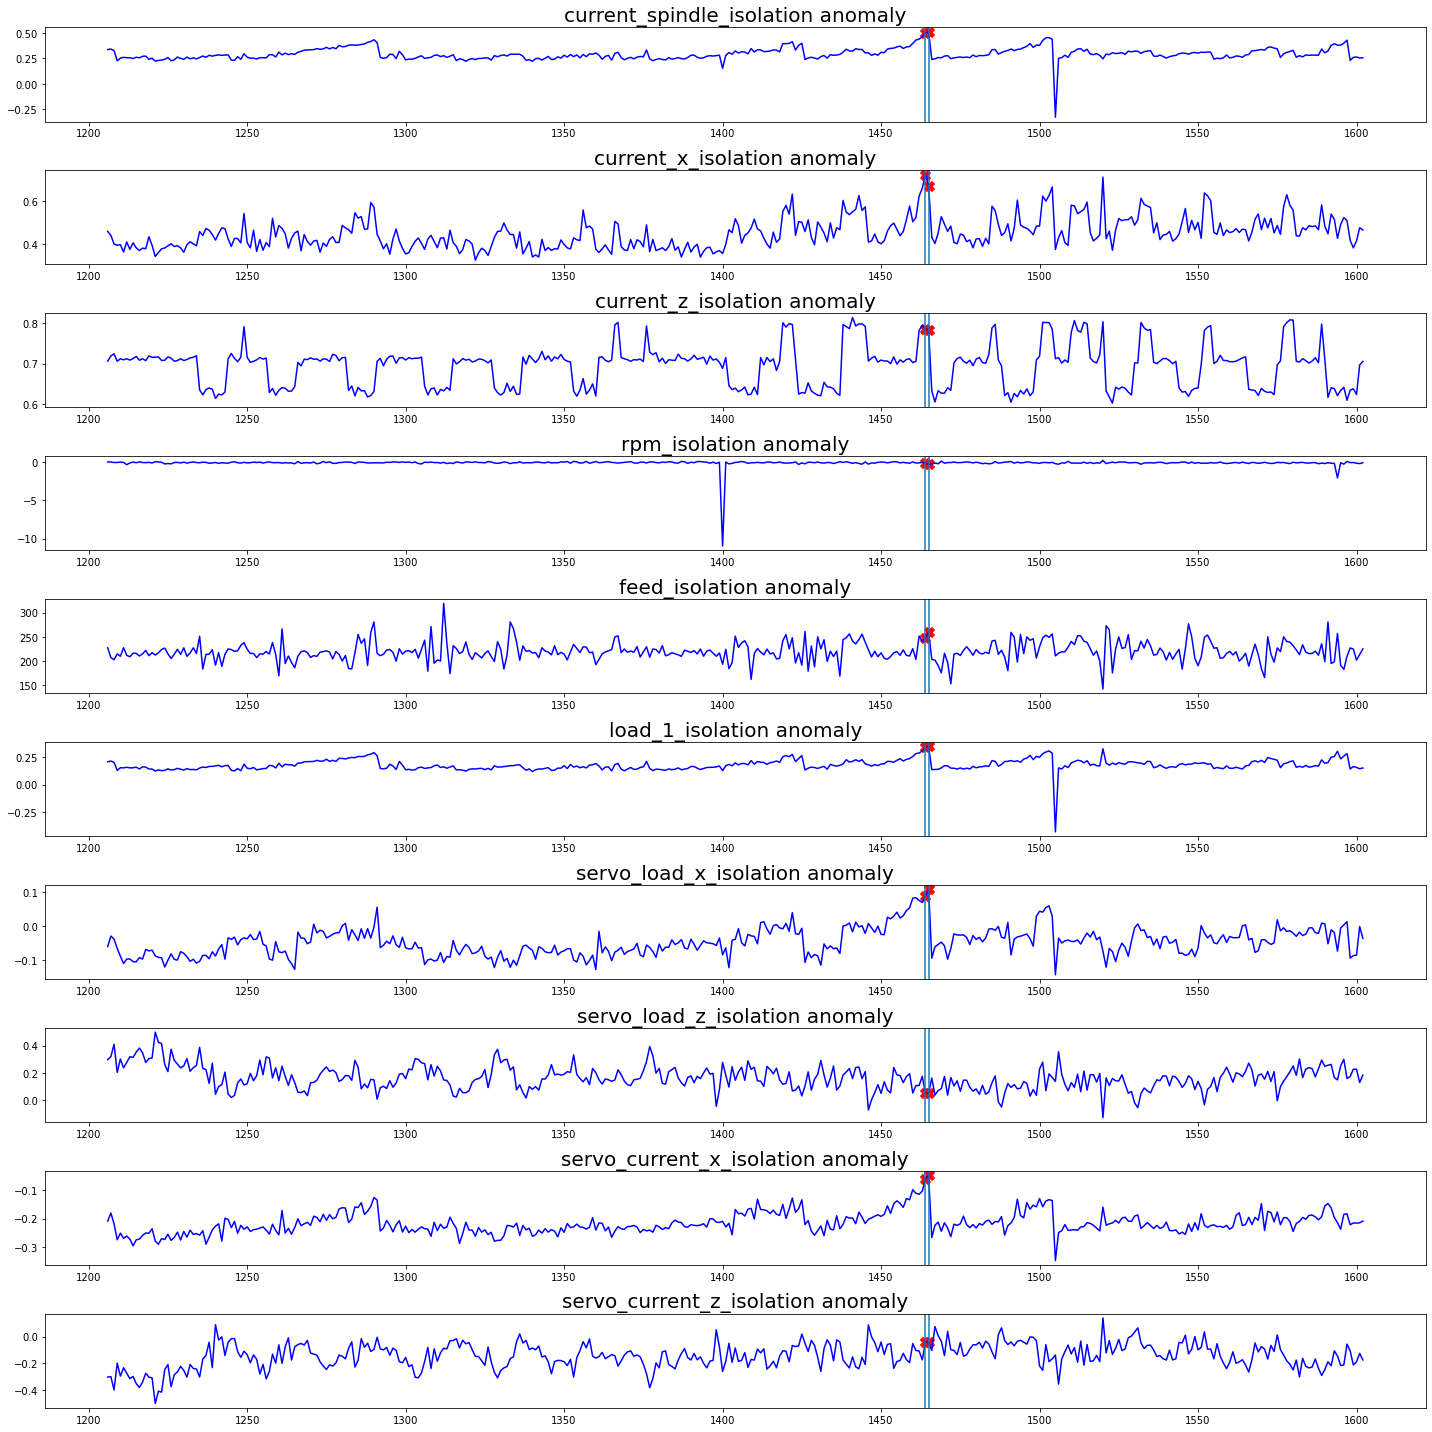

In [143]:
# Train 데이터 시각화
fig = plt.figure(figsize = (20,20))
temp_graph = list(train_parameter.columns)

for fig_idx in range(0, len(temp_graph)):
    locals()['ax_()'.format(fig_idx)] = fig.add_subplot(len(temp_graph), 1, fig_idx+1)
    locals()['ax_()'.format(fig_idx)].plot(train_shot, train_parameter[temp_graph[fig_idx]], color = 'blue')
    locals()['ax_()'.format(fig_idx)].scatter(train_stat.query('IF_Outliers == 1')['real_shot'], train_stat.query('IF_Outliers == 1')[temp_graph[fig_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(train_stat.query('IF_Outliers == 1')['real_shot'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = train_stat.query('IF_Outliers == 1')['real_shot'].values[axv_idx])
    locals()['ax_()'.format(fig_idx)].set_title('{}_isolation anomaly'.format(temp_graph[fig_idx]), fontsize = 20)
#     locals()['ax_()'.format(fig_idx)].set_xticks(np.arange(0, 260, 10))
#     locals()['ax_()'.format(fig_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
#     locals()['ax_()'.format(fig_idx)].set_yticks(np.arange(-5, 5, 3))
#     locals()['ax_()'.format(fig_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig.tight_layout()

In [144]:
# 테스트셋 적용(scaler 변경(모델) standard, standard, robust)
md.check_and_mark_outlier_by_IsolationForest_org(train_stat, test_stat, False, 'current_spindle', 'current_x', 'current_z', 'rpm', 'feed', 'load_1','servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z')

['current_spindle', 'current_x', 'current_z', 'rpm', 'feed', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']


,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
0,6,0.306288,0.539077,0.780148,-0.012334,233.243033,0.193761,0.097435,0.292675,-0.145158,-0.293741,0,-0.559380
1,7,0.288278,0.518757,0.782915,-0.043836,251.790868,0.174690,0.081800,0.359817,-0.170434,-0.339269,0,-0.571891
2,8,0.308084,0.548266,0.793510,-0.130196,252.858840,0.175292,0.058996,0.200396,-0.159319,-0.197046,0,-0.537143
3,9,0.216118,0.436433,0.703821,0.033013,209.981195,0.118918,0.069847,0.183730,-0.160155,-0.184427,0,-0.518653
4,10,0.254666,0.508399,0.778818,-0.084057,236.628141,0.148861,0.074072,0.207401,-0.175080,-0.197198,0,-0.510148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1674,0.278567,0.488983,0.703319,-0.230898,208.970772,0.172025,-0.019207,0.325400,-0.194154,-0.332081,0,-0.495369
1669,1675,0.289896,0.469343,0.706354,-0.107307,212.039248,0.166955,-0.018670,0.337509,-0.200835,-0.334168,0,-0.461393
1670,1676,0.291609,0.421905,0.709428,-0.098915,220.988731,0.176246,-0.004352,0.342237,-0.188752,-0.341124,0,-0.474021
1671,1677,0.293386,0.437064,0.707794,-0.045929,217.261795,0.180197,0.014673,0.234099,-0.191232,-0.234238,0,-0.437513


In [145]:
test_stat

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
0,6,0.306288,0.539077,0.780148,-0.012334,233.243033,0.193761,0.097435,0.292675,-0.145158,-0.293741,0,-0.559380
1,7,0.288278,0.518757,0.782915,-0.043836,251.790868,0.174690,0.081800,0.359817,-0.170434,-0.339269,0,-0.571891
2,8,0.308084,0.548266,0.793510,-0.130196,252.858840,0.175292,0.058996,0.200396,-0.159319,-0.197046,0,-0.537143
3,9,0.216118,0.436433,0.703821,0.033013,209.981195,0.118918,0.069847,0.183730,-0.160155,-0.184427,0,-0.518653
4,10,0.254666,0.508399,0.778818,-0.084057,236.628141,0.148861,0.074072,0.207401,-0.175080,-0.197198,0,-0.510148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1674,0.278567,0.488983,0.703319,-0.230898,208.970772,0.172025,-0.019207,0.325400,-0.194154,-0.332081,0,-0.495369
1669,1675,0.289896,0.469343,0.706354,-0.107307,212.039248,0.166955,-0.018670,0.337509,-0.200835,-0.334168,0,-0.461393
1670,1676,0.291609,0.421905,0.709428,-0.098915,220.988731,0.176246,-0.004352,0.342237,-0.188752,-0.341124,0,-0.474021
1671,1677,0.293386,0.437064,0.707794,-0.045929,217.261795,0.180197,0.014673,0.234099,-0.191232,-0.234238,0,-0.437513


In [146]:
test_stat.query('IF_Outliers == 1')

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
49,55,0.459284,0.698282,0.789636,-0.026496,249.199178,0.306859,0.246557,-0.020405,-0.005710,0.024060,1,-0.690507
52,58,0.452152,0.665709,0.803539,-0.087662,260.263915,0.299496,0.186589,0.015152,-0.029801,-0.020408,1,-0.681042
55,61,0.512654,0.685121,0.791282,-0.112837,236.030608,0.359590,0.224564,-0.042181,0.003141,0.042942,1,-0.701375
56,62,0.510865,0.618180,0.781090,-0.038848,257.646252,0.345586,0.230870,0.002895,-0.003828,-0.000762,1,-0.688634
57,63,0.512056,0.642689,0.773644,-0.025126,241.564185,0.343275,0.221106,0.015989,0.014447,-0.012182,1,-0.683604
58,64,0.528315,0.700232,0.800316,-0.070352,237.711284,0.363832,0.213862,-0.027714,-0.007766,0.051317,1,-0.705162
59,65,0.534478,0.563286,0.700013,-0.085918,215.506287,0.363070,0.303197,-0.058396,0.069206,0.066080,1,-0.679573
61,67,0.540124,0.571383,0.690525,-0.189979,212.172443,0.354071,0.279928,-0.038553,0.041127,0.039109,1,-0.683826
65,71,0.567112,0.572360,0.705765,0.050543,205.137427,0.389545,0.316386,-0.044695,0.053519,0.049986,1,-0.690815
68,74,0.604868,0.615834,0.713650,-0.095616,217.977035,0.417059,0.304324,-0.137509,0.111534,0.138205,1,-0.693130


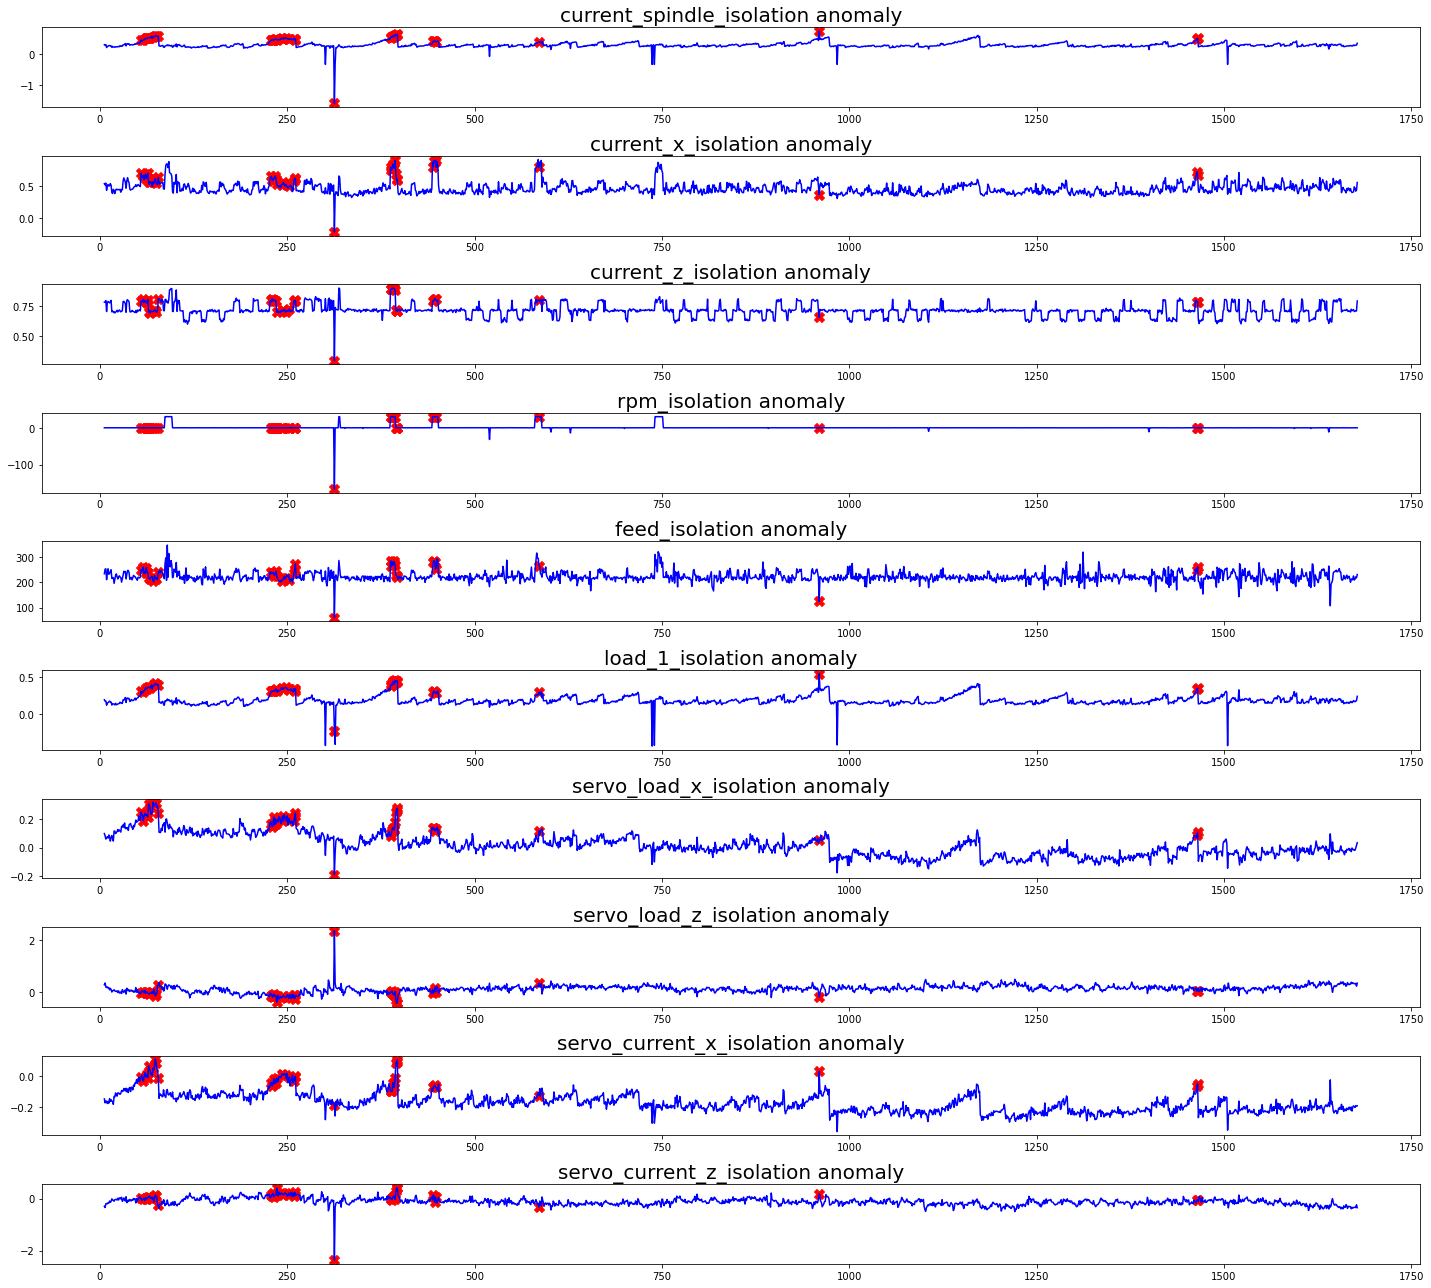

In [147]:
# 테스트 셋 시각화
fig5 = plt.figure(figsize = (20,18))
temp_multi_graph = list(test_parameter.columns)

for fig5_idx in range(0, len(temp_multi_graph)):
    locals()['ax_()'.format(fig5_idx)] = fig5.add_subplot(len(temp_multi_graph), 1, fig5_idx+1)
    locals()['ax_()'.format(fig5_idx)].plot(test_stat['real_shot'], test_stat[temp_multi_graph[fig5_idx]], color = 'blue')
    locals()['ax_()'.format(fig5_idx)].scatter(test_stat.query('IF_Outliers == 1')['real_shot'], test_stat.query('IF_Outliers == 1')[temp_multi_graph[fig5_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(test_stat.query('IF_Outliers == 1')['real_shot'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = test_stat.query('IF_Outliers == 1')['real_shot'].values[axv_idx])
    locals()['ax_()'.format(fig5_idx)].set_title('{}_isolation anomaly'.format(temp_multi_graph[fig5_idx]), fontsize = 20)
    #locals()['ax_()'.format(fig5_idx)].set_xticks(np.arange(min(test_stat['real_shot'])+5, max(test_stat['real_shot'])+5, 20))
    #locals()['ax_()'.format(fig5_idx)].set_xticklabels(np.arange(min(test_stat['real_shot'])+5, max(test_stat['real_shot'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig5_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig5_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig5.tight_layout()

In [148]:
test_stat

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
0,6,0.306288,0.539077,0.780148,-0.012334,233.243033,0.193761,0.097435,0.292675,-0.145158,-0.293741,0,-0.559380
1,7,0.288278,0.518757,0.782915,-0.043836,251.790868,0.174690,0.081800,0.359817,-0.170434,-0.339269,0,-0.571891
2,8,0.308084,0.548266,0.793510,-0.130196,252.858840,0.175292,0.058996,0.200396,-0.159319,-0.197046,0,-0.537143
3,9,0.216118,0.436433,0.703821,0.033013,209.981195,0.118918,0.069847,0.183730,-0.160155,-0.184427,0,-0.518653
4,10,0.254666,0.508399,0.778818,-0.084057,236.628141,0.148861,0.074072,0.207401,-0.175080,-0.197198,0,-0.510148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1674,0.278567,0.488983,0.703319,-0.230898,208.970772,0.172025,-0.019207,0.325400,-0.194154,-0.332081,0,-0.495369
1669,1675,0.289896,0.469343,0.706354,-0.107307,212.039248,0.166955,-0.018670,0.337509,-0.200835,-0.334168,0,-0.461393
1670,1676,0.291609,0.421905,0.709428,-0.098915,220.988731,0.176246,-0.004352,0.342237,-0.188752,-0.341124,0,-0.474021
1671,1677,0.293386,0.437064,0.707794,-0.045929,217.261795,0.180197,0.014673,0.234099,-0.191232,-0.234238,0,-0.437513


# 다. Feature selection - Isolation forest

test_multi_data_scaling 데이터를 활용하여 Isolation forest로 도출된 class를 기반으로 Feature selection을 적용함

# 1) Filter method - Relief algorithm & Mutual Information

Relief algorithm
- wrapper와 embedded method는 예측하는 endpoint에 의존하여 feature을 도출하고 그 부분집합의 평가에 의존함
- 이 알고리즘은 feature의 조합을 통해 feature를 찾지 않고 가장 가까운 neighbors의 개념을 사용하여 상호작용을 간접적으로 설명하는 feature 통계를 도출함
- 타 알고리즘보다 빠르게 계산할 수 있으며, 선택된 feature가 사용된 알고리즘에 종속되지 않음
- 개별 Feature 별로 최고의 영향을 끼치는 Feature을 선택하는 것 뿐만 아니라 진화 알고리즘과 같은 확률적 기계학습 알고리즘에 적용하기 위한 전문 지식으로 활용될 수 있음(Urbanowicz RJ, Granizo-Mackenzie D, Moore JH, 2012 Using expert knowledge to guide covering and mutation in a michigan style learning classifier system to detect epistasis and heterogeneity In: International Conference on Parallel Problem Solving from Nature. Springer, pp. 266–275.)
- Feature을 선택할 때 순위가 지정된 Feature 목록에서 Feature을 포함하기 위해 원하는 기준에 따라 다양한 크기의 Feature 세트를 선택할 수 있음
- ReleiefF는 모든 Feature에 대한 점수를 도출한다.

Mutual Information은 Information Gain이라 부른다.(https://towardsdatascience.com/feature-selection-for-machine-learning-3-categories-and-12-methods-6a4403f86543)
- 단변량 Feature selection 방법 중 가장 유명한 방법임(빠르고 공식이 간단하기 때문)
- 단일 feature에 대한 엔트로프 감소에 대하여 측정한다.

In [149]:
# y를 IF_multi_Outlier 사용
RF_df = test_stat.copy()
RF_X = RF_df.iloc[:,1:-2].values
RF_name = RF_df.iloc[:,1:-2].columns
RF_y = RF_df['IF_Outliers'].values

In [150]:
RF_X

array([[ 0.30628763,  0.5390765 ,  0.78014783, ...,  0.2926755 ,
        -0.14515761, -0.29374143],
       [ 0.28827801,  0.51875659,  0.78291476, ...,  0.35981735,
        -0.17043379, -0.33926941],
       [ 0.30808416,  0.5482658 ,  0.79351009, ...,  0.20039592,
        -0.15931932, -0.19704584],
       ...,
       [ 0.29160854,  0.4219051 ,  0.70942757, ...,  0.34223706,
        -0.18875209, -0.3411241 ],
       [ 0.29338582,  0.4370644 ,  0.70779402, ...,  0.23409882,
        -0.19123173, -0.234238  ],
       [ 0.35545145,  0.55756926,  0.79035122, ...,  0.35085314,
        -0.18955667, -0.34811091]])

In [151]:
# https://github.com/PadraigC/FeatSelTutorial/blob/main/FS-ReliefF.ipynb 참조
from skrebate import ReliefF
rfa = ReliefF(n_features_to_select = 2, n_neighbors = 100, n_jobs = -1)
rfa.fit(RF_X, RF_y)
rfa_scores = rfa.feature_importances_
rfa_scores

array([0.09349221, 0.15971222, 0.12489917, 0.05334341, 0.07978888,
       0.15486921, 0.30328244, 0.07419133, 0.29556047, 0.07197518])

In [152]:
rfa_scores_mod = pd.Series(rfa_scores, index = RF_name)
rfa_scores_mod

current_spindle    0.093492
current_x          0.159712
current_z          0.124899
rpm                0.053343
feed               0.079789
load_1             0.154869
servo_load_x       0.303282
servo_load_z       0.074191
servo_current_x    0.295560
servo_current_z    0.071975
dtype: float64

In [153]:
rfa.transform(RF_X).shape

(1673, 2)

In [154]:
# 각 Feature의 I-gain scores 
from sklearn.feature_selection import mutual_info_classif
i_scores = mutual_info_classif(RF_X, RF_y)
i_scores

array([0.07216857, 0.04776221, 0.01811795, 0.01633089, 0.01632776,
       0.07837876, 0.05256848, 0.03449583, 0.06713876, 0.03481337])

In [155]:
from scipy import stats
stats.spearmanr(rfa_scores, i_scores)

SpearmanrResult(correlation=0.5878787878787878, pvalue=0.07387770688865801)

In [156]:
report=pd.DataFrame({'Mutual Info.':i_scores,'ReliefF':rfa_scores,'Feature':RF_name})
report.set_index('Feature', inplace = True)
report.sort_values('Mutual Info.', inplace = True, ascending = False)
report

,Mutual Info.,ReliefF
Feature,,
load_1,0.078379,0.154869
current_spindle,0.072169,0.093492
servo_current_x,0.067139,0.295560
servo_load_x,0.052568,0.303282
current_x,0.047762,0.159712
servo_current_z,0.034813,0.071975
servo_load_z,0.034496,0.074191
current_z,0.018118,0.124899
rpm,0.016331,0.053343


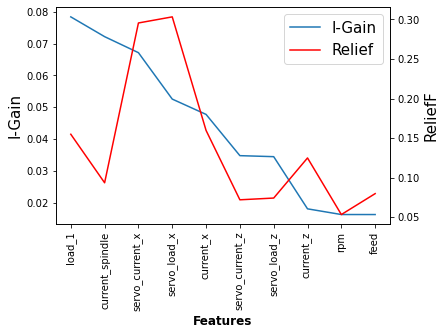

In [157]:
fig, ax = plt.subplots()
rr = range(0,len(RF_name))
ax2 = ax.twinx()
ax.plot(report.index, report["Mutual Info."], label='I-Gain')
ax2.plot(report.index, report["ReliefF"], color='red', label='Relief')
ax.set_xticks(rr)

ax.set_xticklabels(list(report.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('ReliefF')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# 2) Wrapped method

# Sequential Forward Selection(SFS)

아무 Feature도 선택하지 않는 것부터 시작해서 단일 Feature을 통합하는 모든 분류기가 고려됨.

In [158]:
from sklearn.model_selection import train_test_split
SFS_df = test_stat.copy()
SFS_X = SFS_df.iloc[:, 1:-2].values
SFS_y = SFS_df['IF_Outliers'].values
SFS_name = SFS_df.iloc[:, 1:-2].columns
SFS_X_tr, SFS_X_ts, SFS_y_tr, SFS_y_ts = train_test_split(SFS_X, SFS_y, random_state = 42, test_size = 0.2)
max_k = SFS_X_tr.shape[1]
max_k

10

In [159]:
SFS_df.shape

(1673, 13)

In [160]:
SFS_y.shape

(1673,)

In [217]:
SFS_X_ts.shape

(335, 10)

In [220]:
pd.DataFrame(SFS_X_ts,  columns = SFS_name)

,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,0.382520,0.873818,0.784734,29.961066,256.146516,0.267345,0.123609,0.099044,-0.094647,-0.055840
1,0.303673,0.771694,0.803558,30.045082,265.959529,0.201552,-0.022761,0.136612,-0.199411,-0.097678
2,0.273346,0.401693,0.729267,0.082707,229.183793,0.158193,-0.068326,0.195210,-0.221752,-0.183097
3,0.290680,0.519872,0.632372,0.033333,209.917521,0.175763,-0.001404,0.123362,-0.152564,0.010114
4,0.257055,0.492131,0.706742,0.053862,209.317328,0.152520,0.021473,0.200974,-0.215971,-0.193041
...,...,...,...,...,...,...,...,...,...,...
330,0.242771,0.503269,0.621680,0.005126,250.351986,0.148410,-0.088607,0.188951,-0.242364,-0.153780
331,0.248550,0.439898,0.713308,-0.078947,217.969089,0.146796,0.027867,0.357700,-0.180294,-0.341827
332,0.240577,0.406366,0.707006,-0.022604,218.236082,0.139568,0.096155,0.141761,-0.116681,-0.141900
333,-0.071276,0.323651,0.637677,-31.835075,182.281716,0.092377,0.002452,0.350746,-0.168377,-0.328856


In [161]:
np.unique(SFS_y, return_counts = True)

(array([0, 1], dtype=int64), array([1626,   47], dtype=int64))

In [227]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 3)
kNN = kNN.fit(SFS_X_tr, SFS_y_tr)
y_pred = kNN.predict(SFS_X_ts)
acc = accuracy_score(y_pred, SFS_y_ts)
cv_acc = cross_val_score(kNN, SFS_X_tr, SFS_y_tr, cv = 8)

print('Hold Out testing all features : {0:.3f}'.format(acc))

Hold Out testing all features : 0.961


In [163]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
verb = 0
sfs_forward = SFS(kNN, k_features = (1, max_k), forward=True, floating = False, verbose = verb, scoring = 'accuracy', cv = 10, n_jobs = -1)
sfs_forward = sfs_forward.fit(SFS_X_tr, SFS_y_tr, custom_feature_names = SFS_name)

In [164]:
sfs_forward.k_feature_idx_

(0, 1, 7, 9)

In [165]:
sfs_forward.k_feature_names_

('current_spindle', 'current_x', 'servo_load_z', 'servo_current_z')

In [166]:
sfs_forward.get_metric_dict()

{1: {'feature_idx': (9,),
  'cv_scores': array([0.98507463, 0.97761194, 0.97761194, 0.97014925, 0.97014925,
         0.96268657, 0.97014925, 0.96268657, 0.9924812 , 0.97744361]),
  'avg_score': 0.974604421501515,
  'feature_names': ('servo_current_z',),
  'ci_bound': 0.006638756672038607,
  'std_dev': 0.00893852283871455,
  'std_err': 0.00297950761290485},
 2: {'feature_idx': (1, 9),
  'cv_scores': array([0.97761194, 0.98507463, 0.99253731, 0.98507463, 0.98507463,
         1.        , 0.97761194, 0.97761194, 0.98496241, 0.98496241]),
  'avg_score': 0.9850521826955448,
  'feature_names': ('current_x', 'servo_current_z'),
  'ci_bound': 0.0049575946255880484,
  'std_dev': 0.006674980719288755,
  'std_err': 0.0022249935730962516},
 3: {'feature_idx': (0, 1, 9),
  'cv_scores': array([1.        , 0.97761194, 0.99253731, 0.98507463, 0.98507463,
         1.        , 0.98507463, 0.99253731, 0.98496241, 1.        ]),
  'avg_score': 0.9902872853776232,
  'feature_names': ('current_spindle', 'curr

In [167]:
pd.DataFrame.from_dict(sfs_forward.get_metric_dict(), orient = 'index')

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.9850746268656716, 0.9776119402985075, 0.977...",0.974604,"(servo_current_z,)",0.006639,0.008939,0.002980
2,"(1, 9)","[0.9776119402985075, 0.9850746268656716, 0.992...",0.985052,"(current_x, servo_current_z)",0.004958,0.006675,0.002225
3,"(0, 1, 9)","[1.0, 0.9776119402985075, 0.9925373134328358, ...",0.990287,"(current_spindle, current_x, servo_current_z)",0.005576,0.007508,0.002503
4,"(0, 1, 7, 9)","[0.9925373134328358, 0.9850746268656716, 0.992...",0.991034,"(current_spindle, current_x, servo_load_z, ser...",0.004157,0.005597,0.001866
5,"(0, 1, 5, 7, 9)","[1.0, 0.9925373134328358, 0.9925373134328358, ...",0.991034,"(current_spindle, current_x, load_1, servo_loa...",0.005438,0.007321,0.002440
6,"(0, 1, 2, 5, 7, 9)","[1.0, 0.9925373134328358, 0.9925373134328358, ...",0.990287,"(current_spindle, current_x, current_z, load_1...",0.006586,0.008868,0.002956
7,"(0, 1, 2, 5, 6, 7, 9)","[1.0, 0.9850746268656716, 0.9925373134328358, ...",0.989541,"(current_spindle, current_x, current_z, load_1...",0.006177,0.008316,0.002772
8,"(0, 1, 2, 5, 6, 7, 8, 9)","[0.9925373134328358, 0.9850746268656716, 0.992...",0.986550,"(current_spindle, current_x, current_z, load_1...",0.004146,0.005582,0.001861
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)","[1.0, 0.9776119402985075, 0.9925373134328358, ...",0.987297,"(current_spindle, current_x, current_z, rpm, l...",0.006581,0.008861,0.002954
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9552238805970149, 0.9776119402985075, 0.977...",0.974604,"(current_spindle, current_x, current_z, rpm, f...",0.006151,0.008282,0.002761


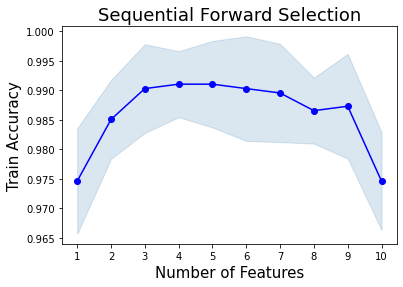

('current_spindle', 'current_x', 'servo_load_z', 'servo_current_z')


In [168]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig_wrapper = plot_sfs(sfs_forward.get_metric_dict(), ylabel = 'Train Accuracy', kind = 'std_dev')

# plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection')
plt.show()
print(sfs_forward.k_feature_names_)

In [179]:
X_train_sfs = sfs_forward.transform(SFS_X_tr)
X_test_sfs = sfs_forward.transform(SFS_X_ts)

kNN_sfs = kNN.fit(X_train_sfs, SFS_y_tr)
y_pred2 = kNN_sfs.predict(X_test_sfs)
acc_SFS = accuracy_score(y_pred2, SFS_y_ts)
cv_acc_SFS = cross_val_score(kNN_sfs, X_test_sfs, SFS_y_ts, cv = 8)

print("X_train shape: ", X_train_sfs.shape)
print("X_Val on SFS all features: {0:.3f}".format(acc_SFS))
print("Hold Out testing: {0:2d} features selected using SFS: {1:.3f}".format(len(sfs_forward.k_feature_idx_), cv_acc_SFS.mean()))

X_train shape:  (1338, 4)
X_Val on SFS all features: 0.982
Hold Out testing:  4 features selected using SFS: 0.970


kNN 기준 4개의 변수('current_spindle', 'current_x', 'servo_load_z', 'servo_current_z')를 활용하는 것이 약 0.991으로 가장 높게 나타났음
1673개 training set을 8:2로 분류하고 X_test_sfs을 적용하였을때 모든 변수를 사용하는 경우 0.974 값이 도출되었으며, 4개의 변수를 활용하는 경우 (0.991 값)가 모든 변수를 사용하는 것보다 높은 것으로 나타남

# Backward Eliminate(BE)

SFS의 반대로 모든 Feature을 선택하고 지속적으로 Feature을 삭제하여 최적을 선택하는 방법

k-NN은 잡음이나 중복 기능에 가장 민감한 대중적인 분류기이기 때문에 Feature selection에 사용됨

In [170]:
BE_df = test_stat.copy()
BE_X = BE_df.iloc[:, 1:-2].values
BE_y = BE_df['IF_Outliers'].values
BE_name = BE_df.iloc[:, 1:-2].columns
BE_X_tr, BE_X_ts, BE_y_tr, BE_y_ts = train_test_split(BE_X, BE_y, random_state = 42, test_size = 0.2)
max_k = BE_X_tr.shape[1]
max_k

10

In [171]:
verb = 1
sfs_backward = SFS(kNN, k_features = (1, max_k),
                  forward = False,
                  floating = False,
                  verbose = verb, 
                  scoring = 'accuracy',
                  cv = 10, n_jobs = -1)

sfs_backward = sfs_backward.fit(BE_X_tr, BE_y_tr,
                               custom_feature_names = BE_name)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using back

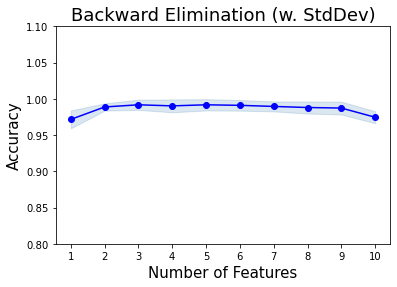

('current_spindle', 'current_x', 'load_1', 'servo_load_z', 'servo_current_x')


In [172]:
fig_wrapper2 = plot_sfs(sfs_backward.get_metric_dict(),
                       ylabel = 'Accuracy',
                       kind = 'std_dev')
plt.ylim([0.8, 1.1])
plt.title('Backward Elimination (w. StdDev)')
plt.show()
print(sfs_backward.k_feature_names_)

In [173]:
sfs_backward.k_feature_idx_, len(sfs_backward.k_feature_idx_)

((0, 1, 5, 7, 8), 5)

In [174]:
sfs_backward.get_metric_dict()

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.95522388, 0.97761194, 0.97761194, 0.97014925, 0.97014925,
         0.97014925, 0.97761194, 0.97761194, 0.98496241, 0.98496241]),
  'avg_score': 0.974604421501515,
  'feature_names': ('current_spindle',
   'current_x',
   'current_z',
   'rpm',
   'feed',
   'load_1',
   'servo_load_x',
   'servo_load_z',
   'servo_current_x',
   'servo_current_z'),
  'ci_bound': 0.0061511130055375346,
  'std_dev': 0.008281951997892356,
  'std_err': 0.002760650665964119},
 9: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([1.        , 0.97761194, 0.99253731, 0.97761194, 0.99253731,
         1.        , 0.97761194, 0.97761194, 0.98496241, 0.9924812 ]),
  'avg_score': 0.9872965997082257,
  'feature_names': ('current_spindle',
   'current_x',
   'current_z',
   'rpm',
   'load_1',
   'servo_load_x',
   'servo_load_z',
   'servo_current_x',
   'servo_current_z'),
  'ci_bound': 0.006581216300994161,
  'std_dev': 0

In [175]:
pd.DataFrame.from_dict(sfs_backward.get_metric_dict(), orient = 'index')

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9552238805970149, 0.9776119402985075, 0.977...",0.974604,"(current_spindle, current_x, current_z, rpm, f...",0.006151,0.008282,0.002761
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)","[1.0, 0.9776119402985075, 0.9925373134328358, ...",0.987297,"(current_spindle, current_x, current_z, rpm, l...",0.006581,0.008861,0.002954
8,"(0, 1, 2, 3, 5, 6, 7, 8)","[1.0, 0.9776119402985075, 0.9925373134328358, ...",0.988043,"(current_spindle, current_x, current_z, rpm, l...",0.006173,0.008311,0.002770
7,"(0, 1, 2, 5, 6, 7, 8)","[1.0, 0.9850746268656716, 1.0, 0.9776119402985...",0.989535,"(current_spindle, current_x, current_z, load_1...",0.005084,0.006845,0.002282
6,"(0, 1, 2, 5, 7, 8)","[1.0, 0.9850746268656716, 1.0, 0.9776119402985...",0.991034,"(current_spindle, current_x, current_z, load_1...",0.005438,0.007321,0.002440
5,"(0, 1, 5, 7, 8)","[1.0, 0.9850746268656716, 1.0, 0.9776119402985...",0.991780,"(current_spindle, current_x, load_1, servo_loa...",0.005794,0.007801,0.002600
4,"(0, 1, 5, 7)","[1.0, 0.9850746268656716, 1.0, 0.9701492537313...",0.990287,"(current_spindle, current_x, load_1, servo_loa...",0.006586,0.008868,0.002956
3,"(0, 1, 7)","[1.0, 0.9925373134328358, 0.9925373134328358, ...",0.991780,"(current_spindle, current_x, servo_load_z)",0.005237,0.007051,0.002350
2,"(1, 7)","[0.9925373134328358, 0.9850746268656716, 1.0, ...",0.988784,"(current_x, servo_load_z)",0.003731,0.005023,0.001674
1,"(7,)","[0.9776119402985075, 0.9701492537313433, 0.970...",0.971619,"(servo_load_z,)",0.009195,0.012380,0.004127


In [177]:
X_train_be = sfs_backward.transform(BE_X_tr)
X_test_be = sfs_backward.transform(BE_X_ts)

kNN_be = kNN.fit(X_train_be, SFS_y_tr)
y_pred_be = kNN_be.predict(X_test_be)
acc_BE = accuracy_score(BE_y_ts, y_pred_be)
cv_acc_BE = cross_val_score(kNN_be, X_test_be, SFS_y_ts, cv=8)

print("X_train shape: ", X_train_be.shape)
print("X_Val on BE all features: {0:.3f}".format(acc_BE)) 
print("Hold Out testing: {0:2d} features selected using BE: {1:.3f}".format(len(sfs_backward.k_feature_idx_), cv_acc_BE.mean())) 

X_train shape:  (1338, 5)
X_Val on BE all features: 0.979
Hold Out testing:  5 features selected using BE: 0.967


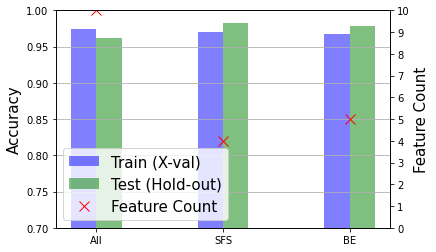

In [180]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
width = 0.2

options = ['All', 'SFS', 'BE']
n_feat = [SFS_X_tr.shape[1], X_train_sfs.shape[1], X_train_be.shape[1]]
accs = [acc,acc_SFS,acc_BE]
xv = [cv_acc.mean(), cv_acc_SFS.mean(), cv_acc_BE.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count',
              marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc='lower left')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
ax2.set_ylim([0, 10])

plt.show()

- kNN 기준 4개의 변수(''current_spindle', 'current_x', 'load_1', 'servo_load_z')를 활용하는 것이 약 0.986으로 가장 높게 나타났음
- SFS와 다르게 servo_load_x 대신 load_1을 활용하는 것이 적합한 것으로 도출됨
- 730개 training set을 8:2로 분류하고 X_test을 적용하였을때 모든 변수를 사용하는 경우 0.976 값이 도출되었으며, 4개의 변수를 활용하는 경우 (0.979 값)가 모든 변수를 사용하는 것보다 미세하게(0.03 차이) 높은 것으로 나타남

# 3) CFS 

CFS는 Filter와 Wrapper method를 절충한 방법으로 분류 모델의 정확도보다 correlation을 사용하여 feature를 추출하는 방법임
(A Feature Selection Method for Multi-Dimension Time-Series Data, Bahavathy Kathirgamanathan and Padraig Cunningham 참조)

# Class-Feature

좋은 변수의 집합은 Class와 매우 높은 상관관계를 가지는 변수이며, Feature-Feature 간의 상관관계가 낮은 변수임
(Correlation-based Feature Selection for Machine Learning - 4.1 Rational 참조)

In [182]:
test_stat

,real_shot,current_spindle,current_x,current_z,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,IF_Outliers,IF_score
0,6,0.306288,0.539077,0.780148,-0.012334,233.243033,0.193761,0.097435,0.292675,-0.145158,-0.293741,0,-0.559380
1,7,0.288278,0.518757,0.782915,-0.043836,251.790868,0.174690,0.081800,0.359817,-0.170434,-0.339269,0,-0.571891
2,8,0.308084,0.548266,0.793510,-0.130196,252.858840,0.175292,0.058996,0.200396,-0.159319,-0.197046,0,-0.537143
3,9,0.216118,0.436433,0.703821,0.033013,209.981195,0.118918,0.069847,0.183730,-0.160155,-0.184427,0,-0.518653
4,10,0.254666,0.508399,0.778818,-0.084057,236.628141,0.148861,0.074072,0.207401,-0.175080,-0.197198,0,-0.510148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1674,0.278567,0.488983,0.703319,-0.230898,208.970772,0.172025,-0.019207,0.325400,-0.194154,-0.332081,0,-0.495369
1669,1675,0.289896,0.469343,0.706354,-0.107307,212.039248,0.166955,-0.018670,0.337509,-0.200835,-0.334168,0,-0.461393
1670,1676,0.291609,0.421905,0.709428,-0.098915,220.988731,0.176246,-0.004352,0.342237,-0.188752,-0.341124,0,-0.474021
1671,1677,0.293386,0.437064,0.707794,-0.045929,217.261795,0.180197,0.014673,0.234099,-0.191232,-0.234238,0,-0.437513


In [183]:
CFS_df = test_stat.copy()
CFS_X = CFS_df.iloc[:,1:-2]
CFS_y = CFS_df['IF_Outliers']
CFS_X_tr, CFS_X_ts, CFS_y_tr, CFS_y_ts = train_test_split(CFS_X, CFS_y, random_state = 42, test_size = 0.2)

In [184]:
kNN.fit(CFS_X_tr, CFS_y_tr)
y_pred = kNN.predict(CFS_X_ts)
acc = accuracy_score(y_pred, CFS_y_ts)
cv_acc = cross_val_score(kNN, CFS_X_tr, CFS_y_tr, cv=8)

print("X_Val on training all features: {0:.7f}".format(cv_acc.mean())) 
print("Hold Out testing all features: {0:.7f}".format(acc)) 

X_Val on training all features: 0.9738603
Hold Out testing all features: 0.9611940


In [185]:
# 모든 변수에 대한 Merit 구하기
from scipy.stats import pointbiserialr
from math import sqrt

subset = CFS_X_tr.columns.tolist()
label = CFS_y_tr

# 전체 변수를 사용하였을 때, merit 값 도출
k = len(subset)

# average feature-class correlation
rcf_all = []
for feature in subset:
    coeff = pointbiserialr(CFS_X_tr[feature], CFS_y_tr)
    print('Feature : ', feature, end = '   ')
    print('Feature- Class Correlation result : ', abs(coeff[0]))
    rcf_all.append(abs(coeff.correlation))
rcf = np.mean(rcf_all)

# average feature-feature correlation
corr = CFS_X_tr[subset].corr()
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr = abs(corr)
rff = corr.unstack().mean()
merit = (k * rcf) / sqrt(k + k * (k-1) * rff)
print('Merit Score of Selected Features: {:.4f}'.format(merit))

Feature :  current_spindle   Feature- Class Correlation result :  0.266131583735714
Feature :  current_x   Feature- Class Correlation result :  0.3284952119651152
Feature :  current_z   Feature- Class Correlation result :  0.1859645043912977
Feature :  rpm   Feature- Class Correlation result :  0.05464606028403371
Feature :  feed   Feature- Class Correlation result :  0.11854878692880653
Feature :  load_1   Feature- Class Correlation result :  0.3619164679401532
Feature :  servo_load_x   Feature- Class Correlation result :  0.32730128938369885
Feature :  servo_load_z   Feature- Class Correlation result :  0.17199533036633488
Feature :  servo_current_x   Feature- Class Correlation result :  0.40484570503562045
Feature :  servo_current_z   Feature- Class Correlation result :  0.1646508318278059
Merit Score of Selected Features: 0.3645


- 모든 변수를 사용하였을 경우 Merit 값이 0.3645로 도출됨

In [186]:
a = pd.Series(rcf_all, index = subset)
subset2 = a[a > 0.24].index
subset2

Index(['current_spindle', 'current_x', 'load_1', 'servo_load_x',
       'servo_current_x'],
      dtype='object')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'current_spindle'),
  Text(0, 1.5, 'current_x'),
  Text(0, 2.5, 'current_z'),
  Text(0, 3.5, 'rpm'),
  Text(0, 4.5, 'feed'),
  Text(0, 5.5, 'load_1'),
  Text(0, 6.5, 'servo_load_x'),
  Text(0, 7.5, 'servo_load_z'),
  Text(0, 8.5, 'servo_current_x'),
  Text(0, 9.5, 'servo_current_z')])

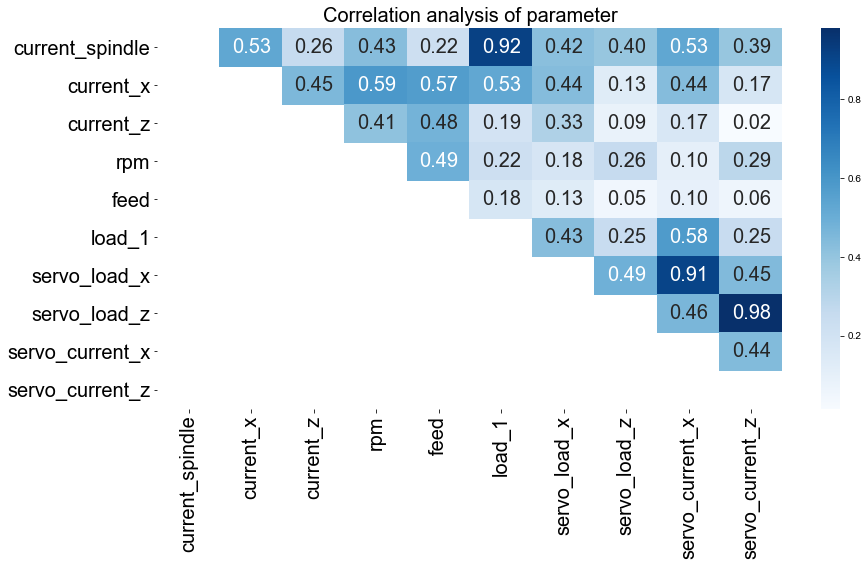

In [187]:
plt.figure(figsize = (14, 7))
sns.heatmap(data = corr, annot = True, fmt = '.2f', cmap = 'Blues', annot_kws = {'size':20})
sns.set(font_scale=1)
plt.title('Correlation analysis of parameter', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)

Text(0.5, 1.0, 'Correlation between Class and feature scatter')

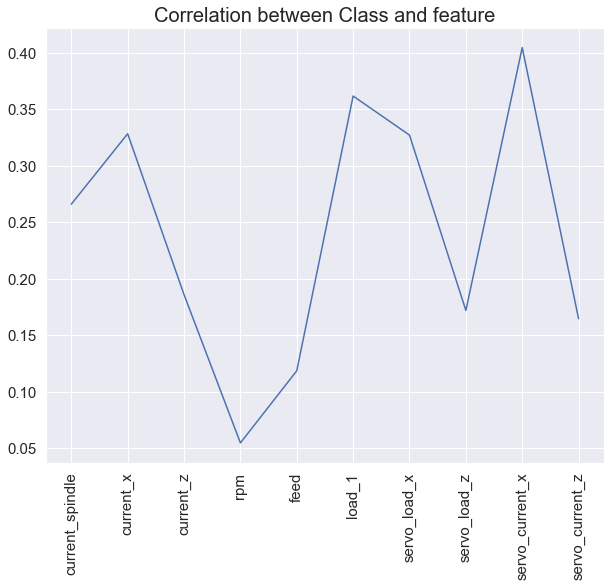

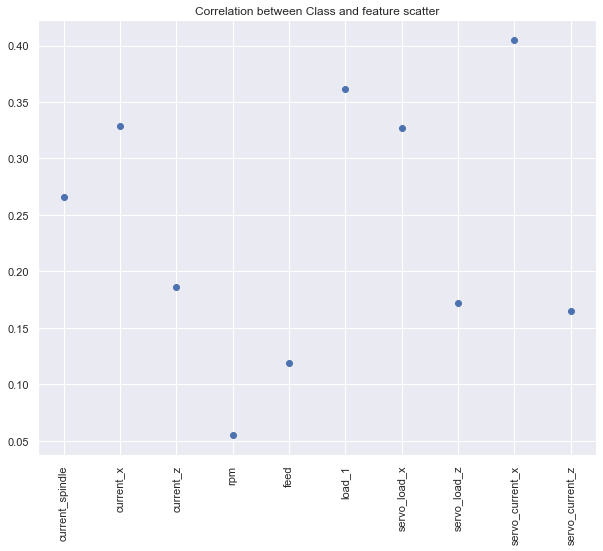

In [188]:
plt.figure(figsize = (10,8))
plt.plot(subset, rcf_all)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation between Class and feature', fontsize = 20)

fig = plt.figure(figsize =(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x = subset, y =rcf_all)
ax.set_xticklabels(subset, rotation=90)
ax.set_title('Correlation between Class and feature scatter')

# Feature-Feature

In [189]:
# Feature-Feature 상관관계 도출
corr2 = CFS_X_tr[subset2].corr()
corr2.values[np.tril_indices_from(corr2.values)] = np.nan
corr2

,current_spindle,current_x,load_1,servo_load_x,servo_current_x
current_spindle,NaN,0.530102,0.917980,0.423109,0.528427
current_x,NaN,NaN,0.525582,0.437754,0.437418
load_1,NaN,NaN,NaN,0.433639,0.579778
servo_load_x,NaN,NaN,NaN,NaN,0.907436
servo_current_x,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation analysis of subset2')

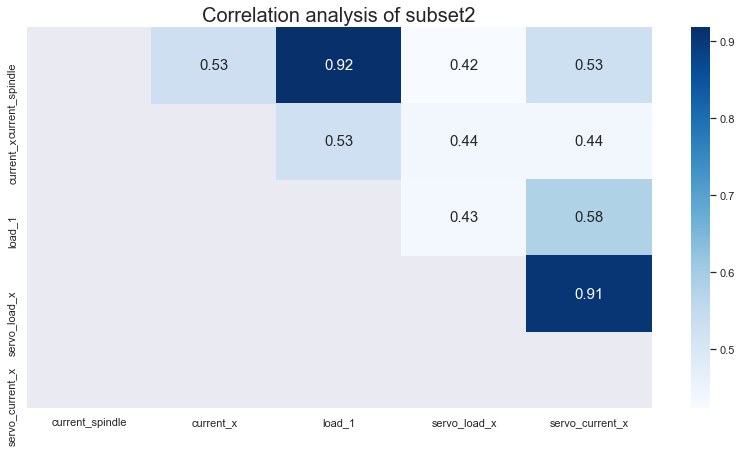

In [190]:
plt.figure(figsize = (14, 7))
sns.heatmap(data = corr2, annot = True, fmt = '.2f', cmap = 'Blues', annot_kws = {'size':15})
sns.set(font_scale = 1.5)
plt.title('Correlation analysis of subset2', fontsize = 20)

In [191]:
subset2

Index(['current_spindle', 'current_x', 'load_1', 'servo_load_x',
       'servo_current_x'],
      dtype='object')

Text(0.5, 1.0, 'Correlation analysis of A company')

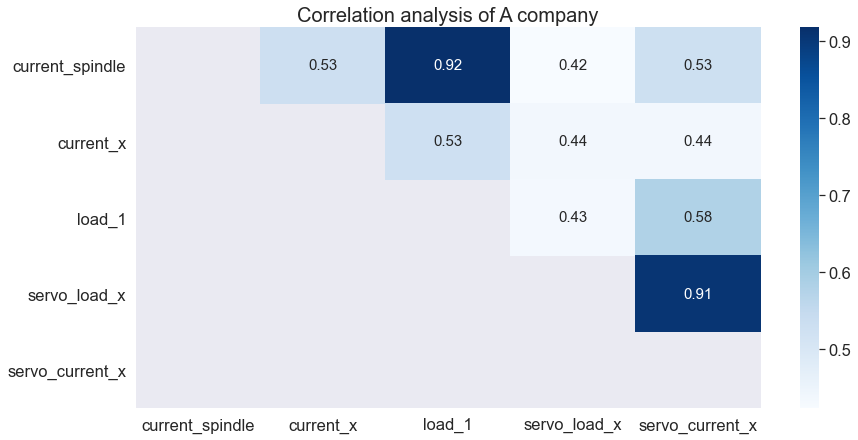

In [192]:
# English 버전
subset2_eng = CFS_X_tr[subset2]
subset2_eng = subset2_eng.rename({'1속도':'1 velocity',	'고속속도':'high-velocity',	'최고속도':'maximum velocity ',	'실린더압력':'cylinder pressure',	'주조압력':'casting pressure',	'비스킷두께':'biscuit thickness',	'형체력':'clamping force',	'저속시간':'low-velocity time',	'고속시간':'high-velocity time',	'고속상승시간':'high-velocity rise time',	'급탕시간':'hot warter time',	'저속스트로크':'low-velocity stroke',	'전체스트로크':'overall-velocity stroke'}, axis = 1)
corr2_eng = subset2_eng.corr()
corr2_eng.values[np.tril_indices_from(corr2_eng.values)] = np.nan
plt.figure(figsize = (14, 7))
sns.heatmap(data = corr2_eng, annot = True, fmt = '.2f', cmap = 'Blues', annot_kws = {'size':15})
sns.set(font_scale = 1.5)
plt.title('Correlation analysis of A company', fontsize = 20)

In [193]:
k2 = len(subset2)

# average feature-class correlation
rcf_all2 = []
for feature2 in subset2:
    coeff2 = pointbiserialr(CFS_X_tr[feature2], CFS_y_tr)
    rcf_all2.append(abs(coeff2.correlation))
rcf2 = np.mean(rcf_all2)

# average feature-feature correlation
corr2 = CFS_X_tr[subset2].corr()
corr2.values[np.tril_indices_from(corr2.values)] = np.nan
corr2 = abs(corr2)
rff2 = corr2.unstack().mean()
merit2 = (k2 * rcf2) / sqrt(k2 + k2 * (k2-1) * rff2)
print('Merit Score of Selected Features: {:.4f}'.format(merit2))

Merit Score of Selected Features: 0.4165


- 모든 변수를 사용하였을 경우 Merit 값이 0.3882로 도출됨
- current_spindle과 current_x만 사용하였을 경우 Merit 값이 0.6266으로 도출됨

1. current_spindle   Feature- Class Correlation result :  0.4823144086867416
2. current_x   Feature- Class Correlation result :  0.4762180124743212
3. current_z   Feature- Class Correlation result :  0.16908520998631515
4. rpm   Feature- Class Correlation result :  0.056867213665450375
5. load_1   Feature- Class Correlation result :  0.34006168037897155
6. servo_load_x   Feature- Class Correlation result :  0.27966979752974264
7. servo_load_z   Feature- Class Correlation result :  0.205315724412367

In [194]:
# 변수와 클래스 간의 상관관계
apply_feature = []
apply_feature_name = []
column_corr = []
for feature_idx in subset2:
    coeff = pointbiserialr(CFS_X_tr[feature_idx], CFS_y_tr)
    abs_coeff = abs(coeff.correlation)
    if abs_coeff > 0.2:
        apply_feature.append(abs_coeff)
        apply_feature_name.append(feature_idx)
for pair in zip(apply_feature_name, apply_feature):
    print(pair)
    column_corr.append(pair)

('current_spindle', 0.266131583735714)
('current_x', 0.3284952119651152)
('load_1', 0.3619164679401532)
('servo_load_x', 0.32730128938369885)
('servo_current_x', 0.40484570503562045)


In [195]:
column_corr

[('current_spindle', 0.266131583735714),
 ('current_x', 0.3284952119651152),
 ('load_1', 0.3619164679401532),
 ('servo_load_x', 0.32730128938369885),
 ('servo_current_x', 0.40484570503562045)]

In [196]:
# 0.3 이하 변수 삭제
subset3 = ['load_1', 'current_x', 'servo_load_x', 'servo_current_x']
k3 = len(subset3)

# average feature-class correlation
rcf_all3 = []
for feature3 in subset3:
    coeff3 = pointbiserialr(CFS_X_tr[feature3], CFS_y_tr)
    rcf_all3.append(abs(coeff3.correlation))
rcf3 = np.mean(rcf_all3)

# average feature-feature correlation
corr3 = CFS_X_tr[subset3].corr()
corr3.values[np.tril_indices_from(corr3.values)] = np.nan
corr3 = abs(corr3)
rff3 = corr3.unstack().mean()
merit3 = (k3 * rcf3) / sqrt(k3 + k3 * (k3-1) * rff3)
print('Merit Score of Selected Features: {:.4f}'.format(merit3))

Merit Score of Selected Features: 0.4360


In [197]:
corr3

,load_1,current_x,servo_load_x,servo_current_x
load_1,NaN,0.525582,0.433639,0.579778
current_x,NaN,NaN,0.437754,0.437418
servo_load_x,NaN,NaN,NaN,0.907436
servo_current_x,NaN,NaN,NaN,NaN


In [198]:
best_value = -1
best_feature = ''
for feature4 in subset3:
    coeff4 = pointbiserialr(CFS_X_tr[feature4], CFS_y_tr)
    abs_coeff4 = abs(coeff4.correlation)
    if abs_coeff4 > best_value:
        best_value = abs_coeff4
        best_feature = feature4

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature servo_current_x with merit 0.4048
